In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math   
from itertools import combinations


In [2]:
# function to plot heatmap for 15 trees with their changed trees
def plot_heatmap(df_list, trees, title = ''):
    fig, ax = plt.subplots(5, 3, figsize=(18, 16))
    for i in range(0,15):
        plot = sns.heatmap(df_list[i], annot=True, cmap="crest",vmin = 0, vmax = 1, 
                           ax=ax[math.floor(i/3), i - 3*math.floor(i/3)], cbar = False);
        plot.xaxis.tick_top()
        plot.set_title(trees[i])
        plot.tick_params(axis='y', rotation=0)
    fig.suptitle(title, fontsize='xx-large')
    plt.tight_layout()

In [3]:
trees = ["(((4,3),2),1)","(((4,2),3),1)","(((3,2),4),1)","(((4,3),1),2)","(((4,1),3),2)",
         "(((1,3),4),2)","(((1,2),4),3)","(((4,2),1),3)","(((4,1),2),3)","(((2,1),3),4)",
         "(((1,3),2),4)","(((3,2),1),4)","((4,3),(2,1))","((4,1),(2,3))","((4,2),(3,1))"]

In [4]:
unrooted = ["1: 12|34","2: 13|24","3: 14|23","4: 12|34","5: 14|23",
            "6: 13|24","7: 12|34","8: 13|24","9: 14|23","10: 12|34",
            "11: 13|24","12: 14|23","13: 12|34","14: 14|23","15: 13|24"]
newIdx = ["1: 12|34", "4: 12|34", "7: 12|34", "10: 12|34", "13: 12|34", 
          "2: 13|24", "6: 13|24", "8: 13|24", "11: 13|24", "15: 13|24", 
          "3: 14|23", "5: 14|23", "9: 14|23", "12: 14|23", "14: 14|23"]

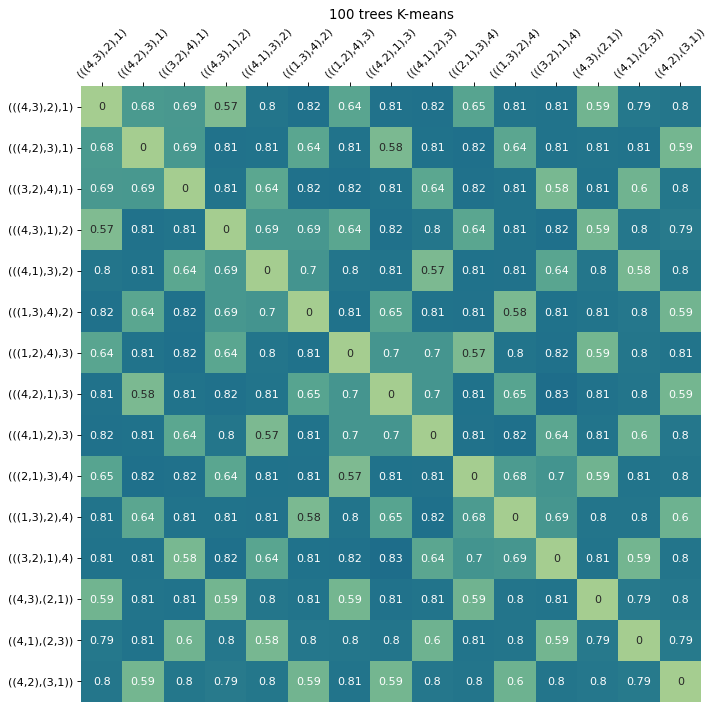

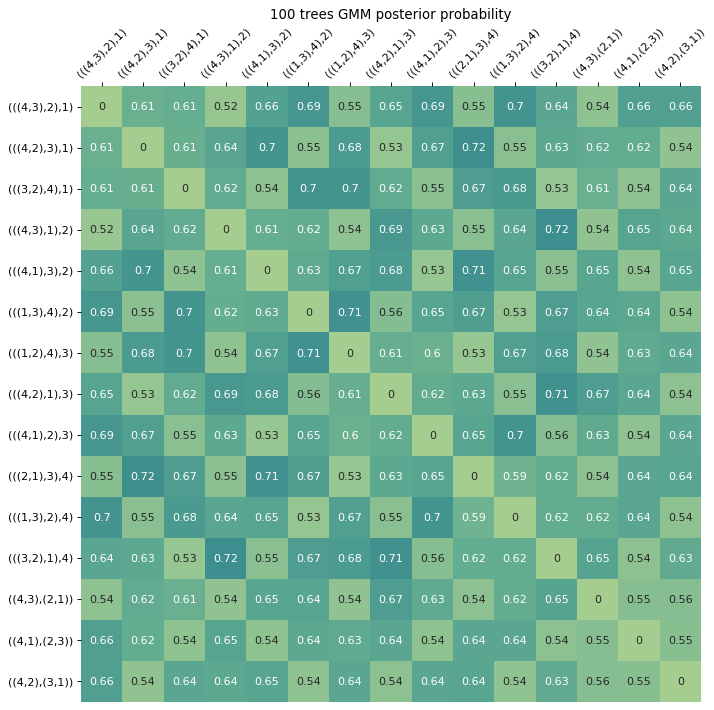

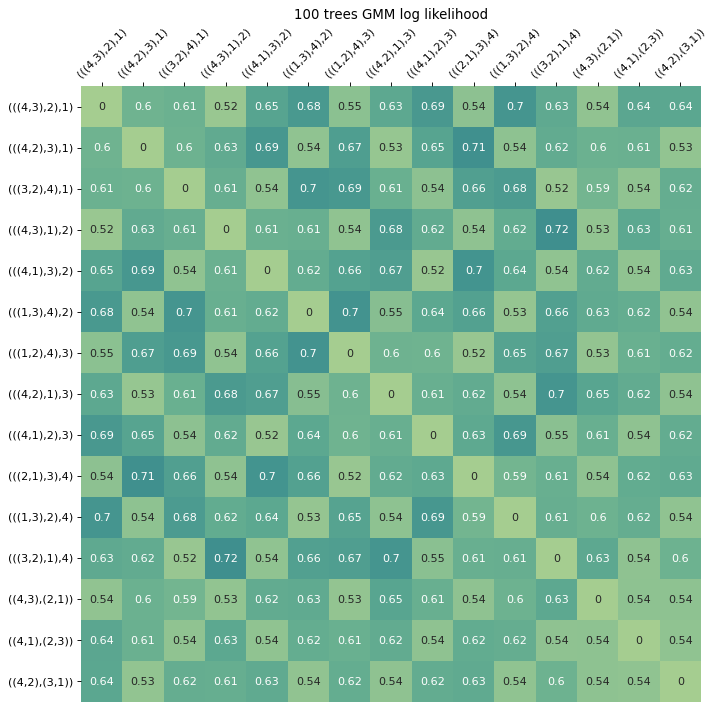

In [45]:
df = pd.read_csv("../../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
kmeans_100 = pd.DataFrame(accuracy)
kmeans_100.columns = trees
kmeans_100.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('100 trees K-means')
plot = sns.heatmap(kmeans_100, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


df = pd.read_csv("../../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
prob_100 = pd.DataFrame(accuracy)
prob_100.columns = trees
prob_100.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('100 trees GMM posterior probability')
plot = sns.heatmap(prob_100, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/4-taxon/same-topo/GMM/GMM_llpg_4taxa_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/same-topo/GMM/GMM_llpg_4taxa_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
llpg_100 = pd.DataFrame(accuracy)
llpg_100.columns = trees
llpg_100.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('100 trees GMM log likelihood')
plot = sns.heatmap(llpg_100, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

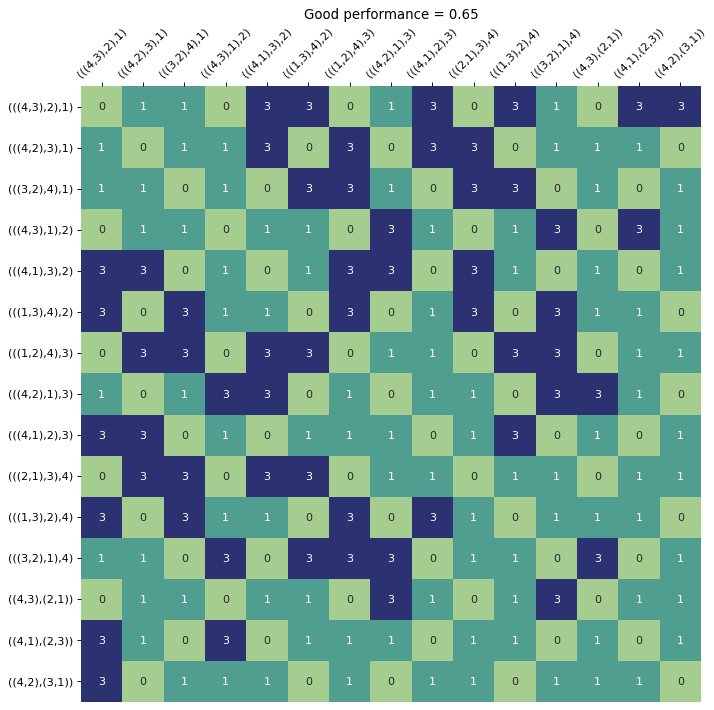

In [13]:
# 100 trees
result_kmeans = kmeans_100.to_numpy()
result_GMM = prob_100.to_numpy()
all_comb = list(combinations(range(0,15),2))
good_kmeans = []
good_GMM = []
good_both = []
bad_both = []
for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    if result_GMM[i,j] >= 0.65 and result_kmeans[i,j] >= 0.65:
        good_both.append(pair)
        good_kmeans.append(pair)
        good_GMM.append(pair)
    elif result_kmeans[i,j] >= 0.65:
        good_kmeans.append(pair)
    elif result_GMM[i,j] >= 0.65:
        good_GMM.append(pair)
    else:
        bad_both.append(pair)
        
matrix = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix[i][j] += 1
    matrix[j][i] += 1

for pair in good_GMM:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix[i][j] += 2
    matrix[j][i] += 2
    
matrix = pd.DataFrame(matrix)
matrix.columns = trees
matrix.index =trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.65')
plot = sns.heatmap(matrix, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)
plot.xaxis.tick_top()

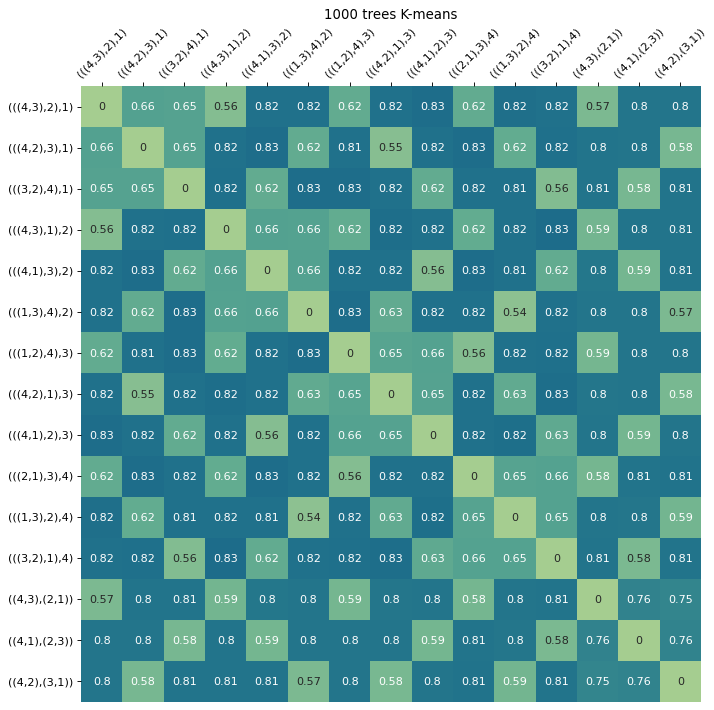

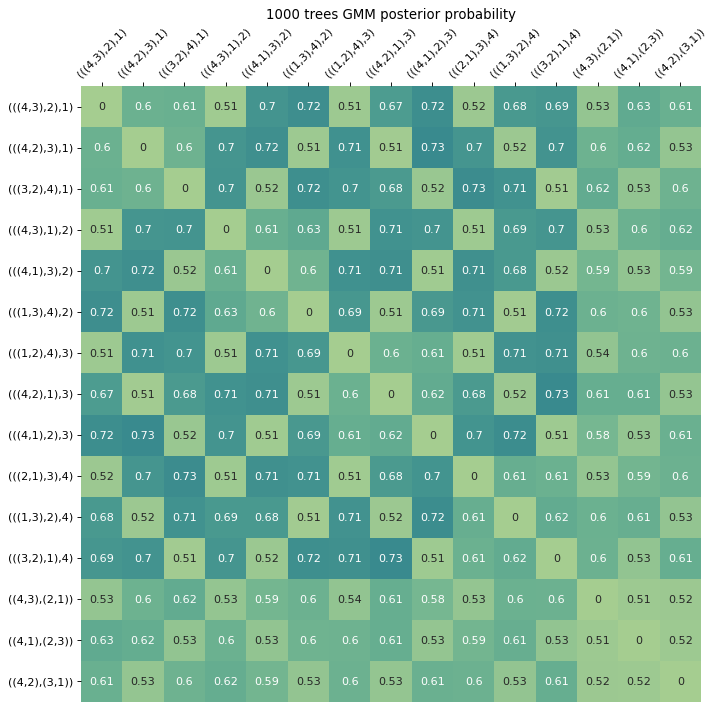

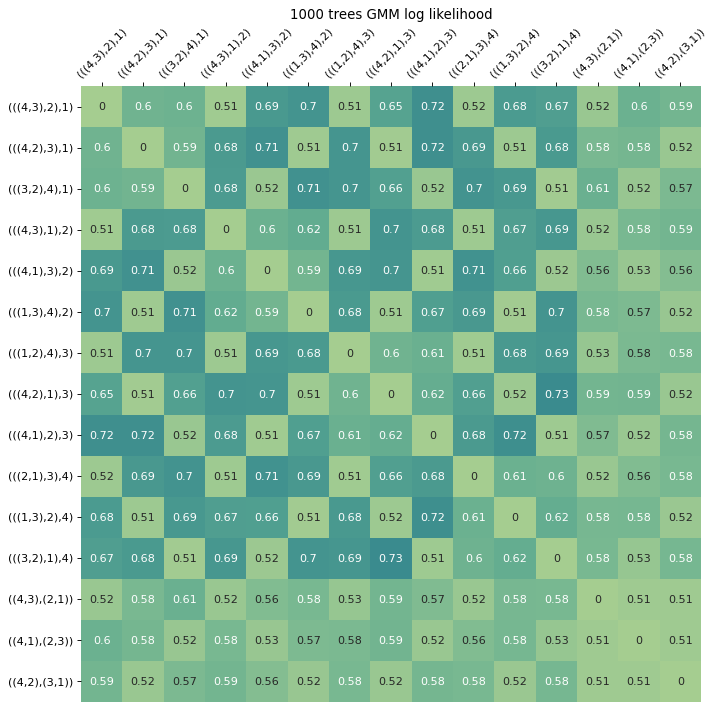

In [46]:
df = pd.read_csv("../../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
kmeans_1000 = pd.DataFrame(accuracy)
kmeans_1000.columns = trees
kmeans_1000.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('1000 trees K-means')
plot = sns.heatmap(kmeans_1000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


df = pd.read_csv("../../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
prob_1000 = pd.DataFrame(accuracy)
prob_1000.columns = trees
prob_1000.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('1000 trees GMM posterior probability')
plot = sns.heatmap(prob_1000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/4-taxon/same-topo/GMM/GMM_llpg_4taxa_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/same-topo/GMM/GMM_llpg_4taxa_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
llpg_1000 = pd.DataFrame(accuracy)
llpg_1000.columns = trees
llpg_1000.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('1000 trees GMM log likelihood')
plot = sns.heatmap(llpg_1000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

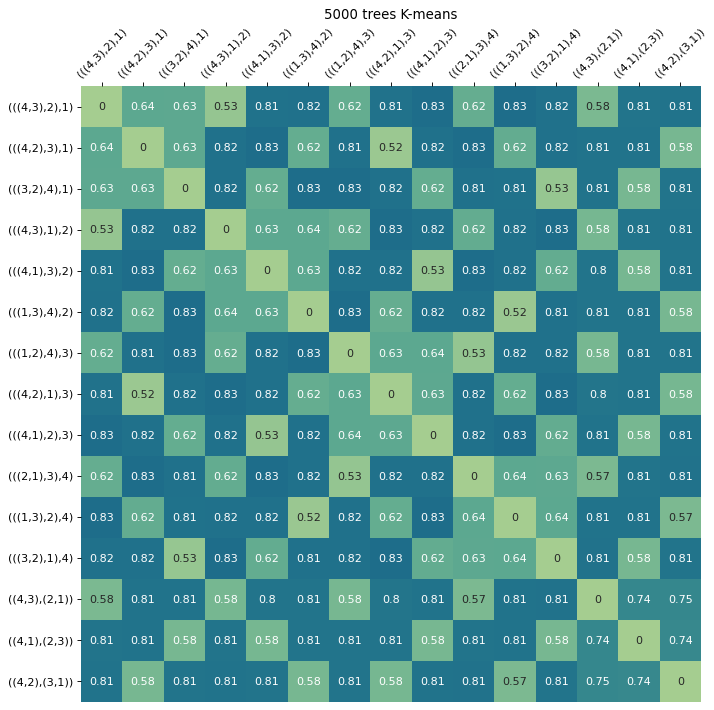

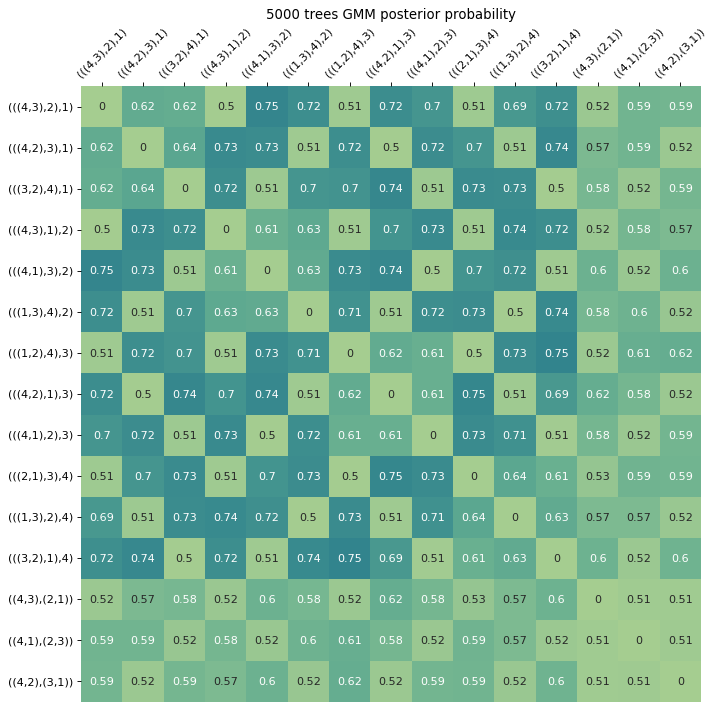

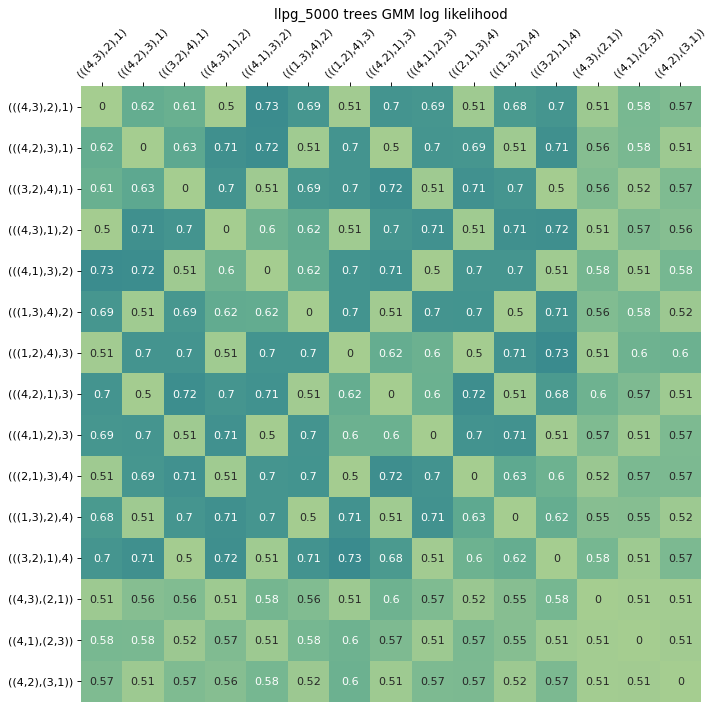

In [47]:
df = pd.read_csv("../../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/same-topo/Kmeans/kmeans_4taxa_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
kmeans_5000 = pd.DataFrame(accuracy)
kmeans_5000.columns = trees
kmeans_5000.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('5000 trees K-means')
plot = sns.heatmap(kmeans_5000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)



df = pd.read_csv("../../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/same-topo/GMM/GMM_prob_4taxa_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
prob_5000 = pd.DataFrame(accuracy)
prob_5000.columns = trees
prob_5000.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('5000 trees GMM posterior probability')
plot = sns.heatmap(prob_5000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)



df = pd.read_csv("../../../data/result/4-taxon/same-topo/GMM/GMM_llpg_4taxa_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/same-topo/GMM/GMM_llpg_4taxa_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
llpg_5000 = pd.DataFrame(accuracy)
llpg_5000.columns = trees
llpg_5000.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('llpg_5000 trees GMM log likelihood')
plot = sns.heatmap(llpg_5000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


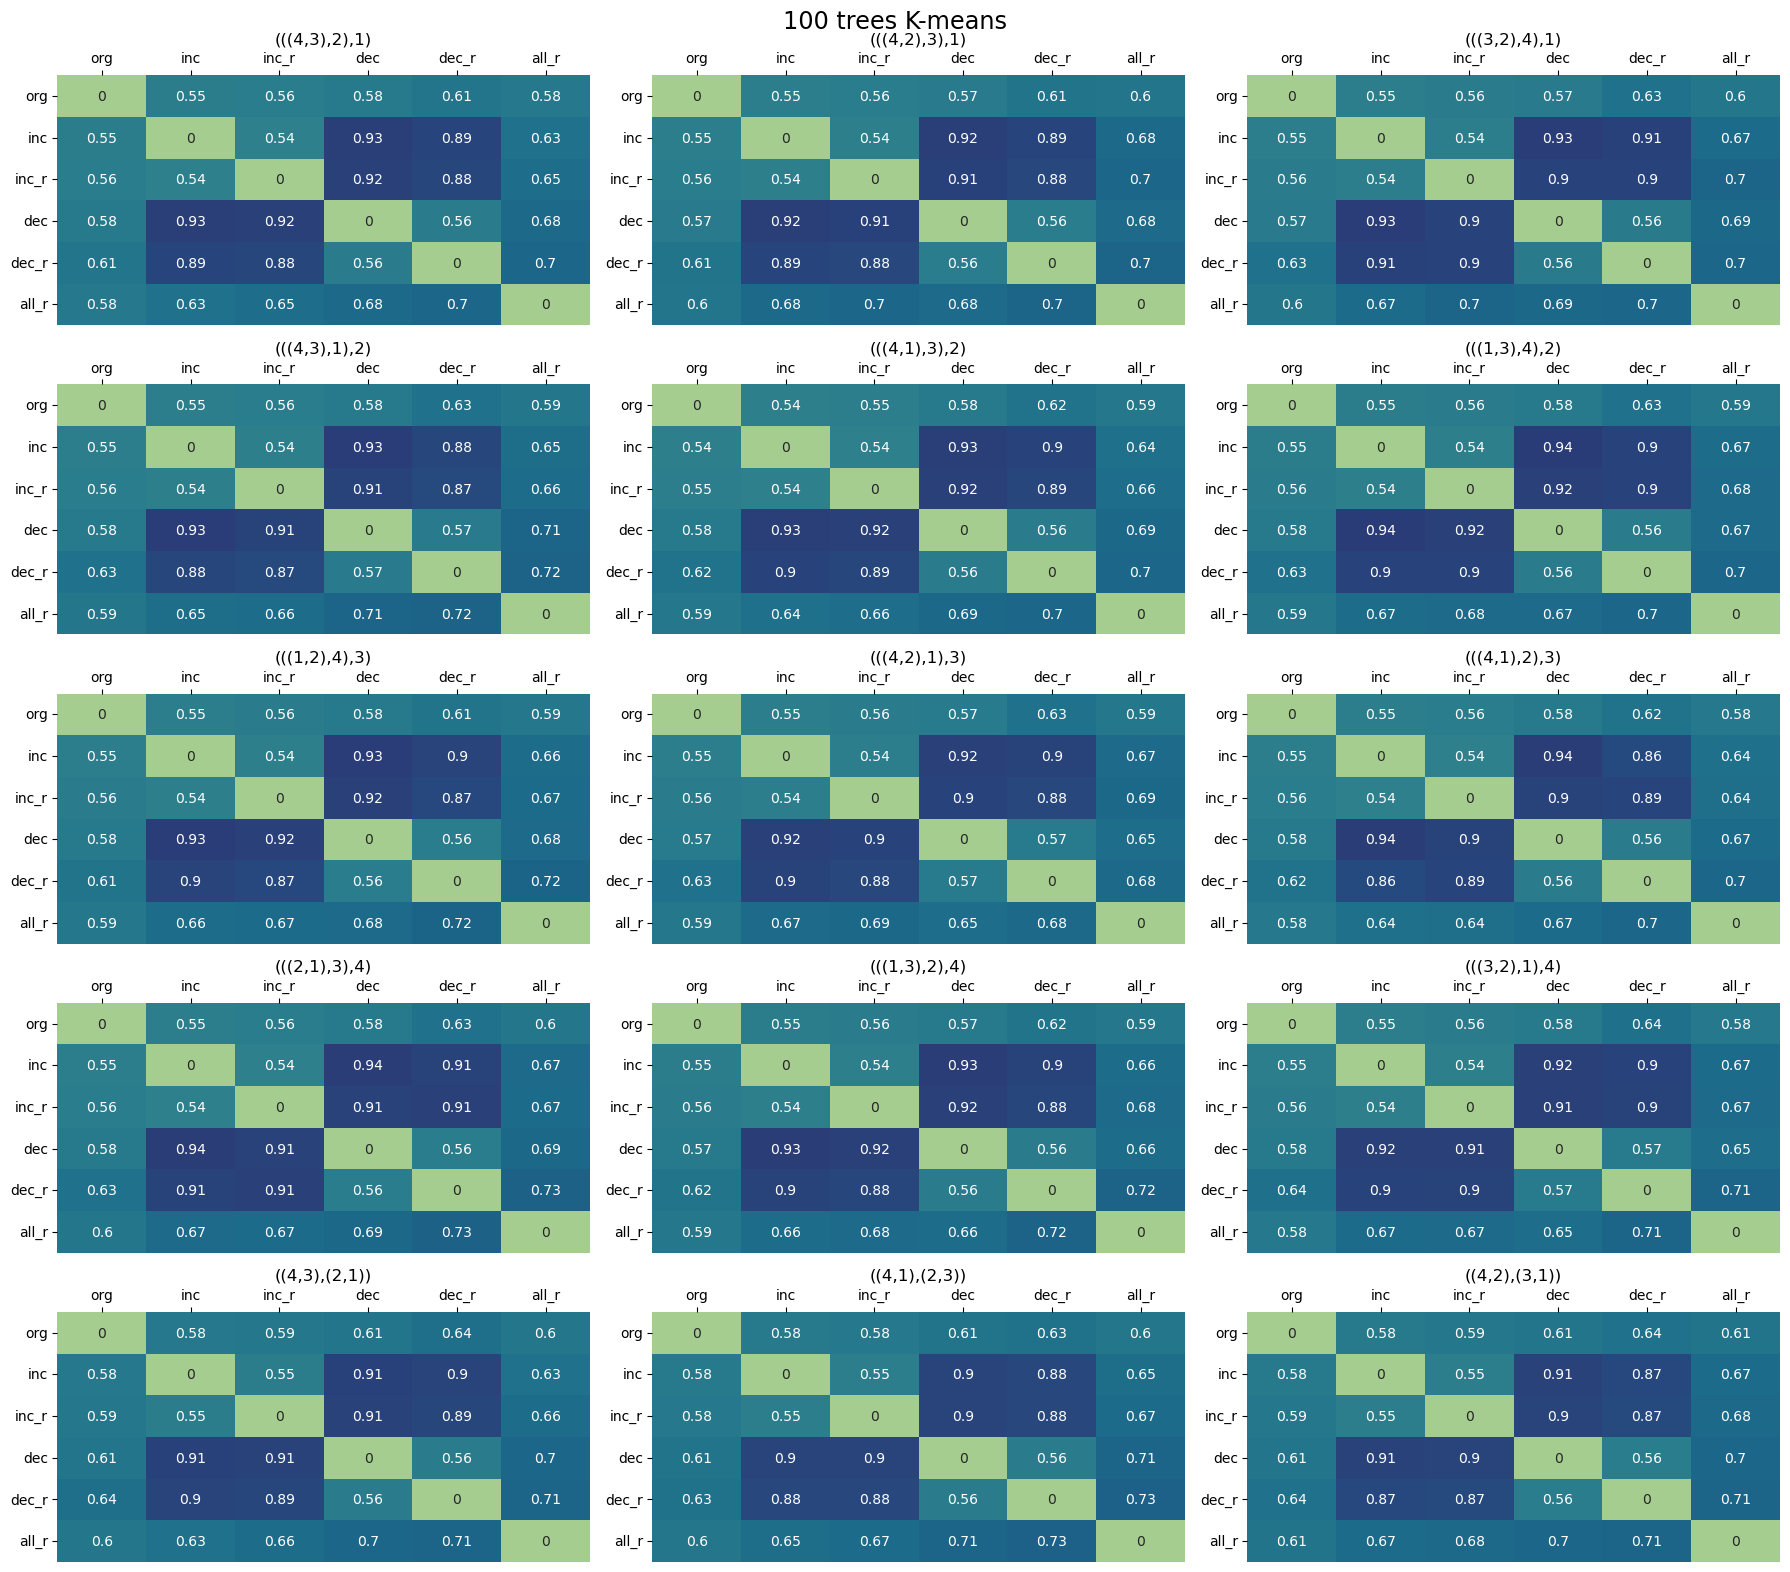

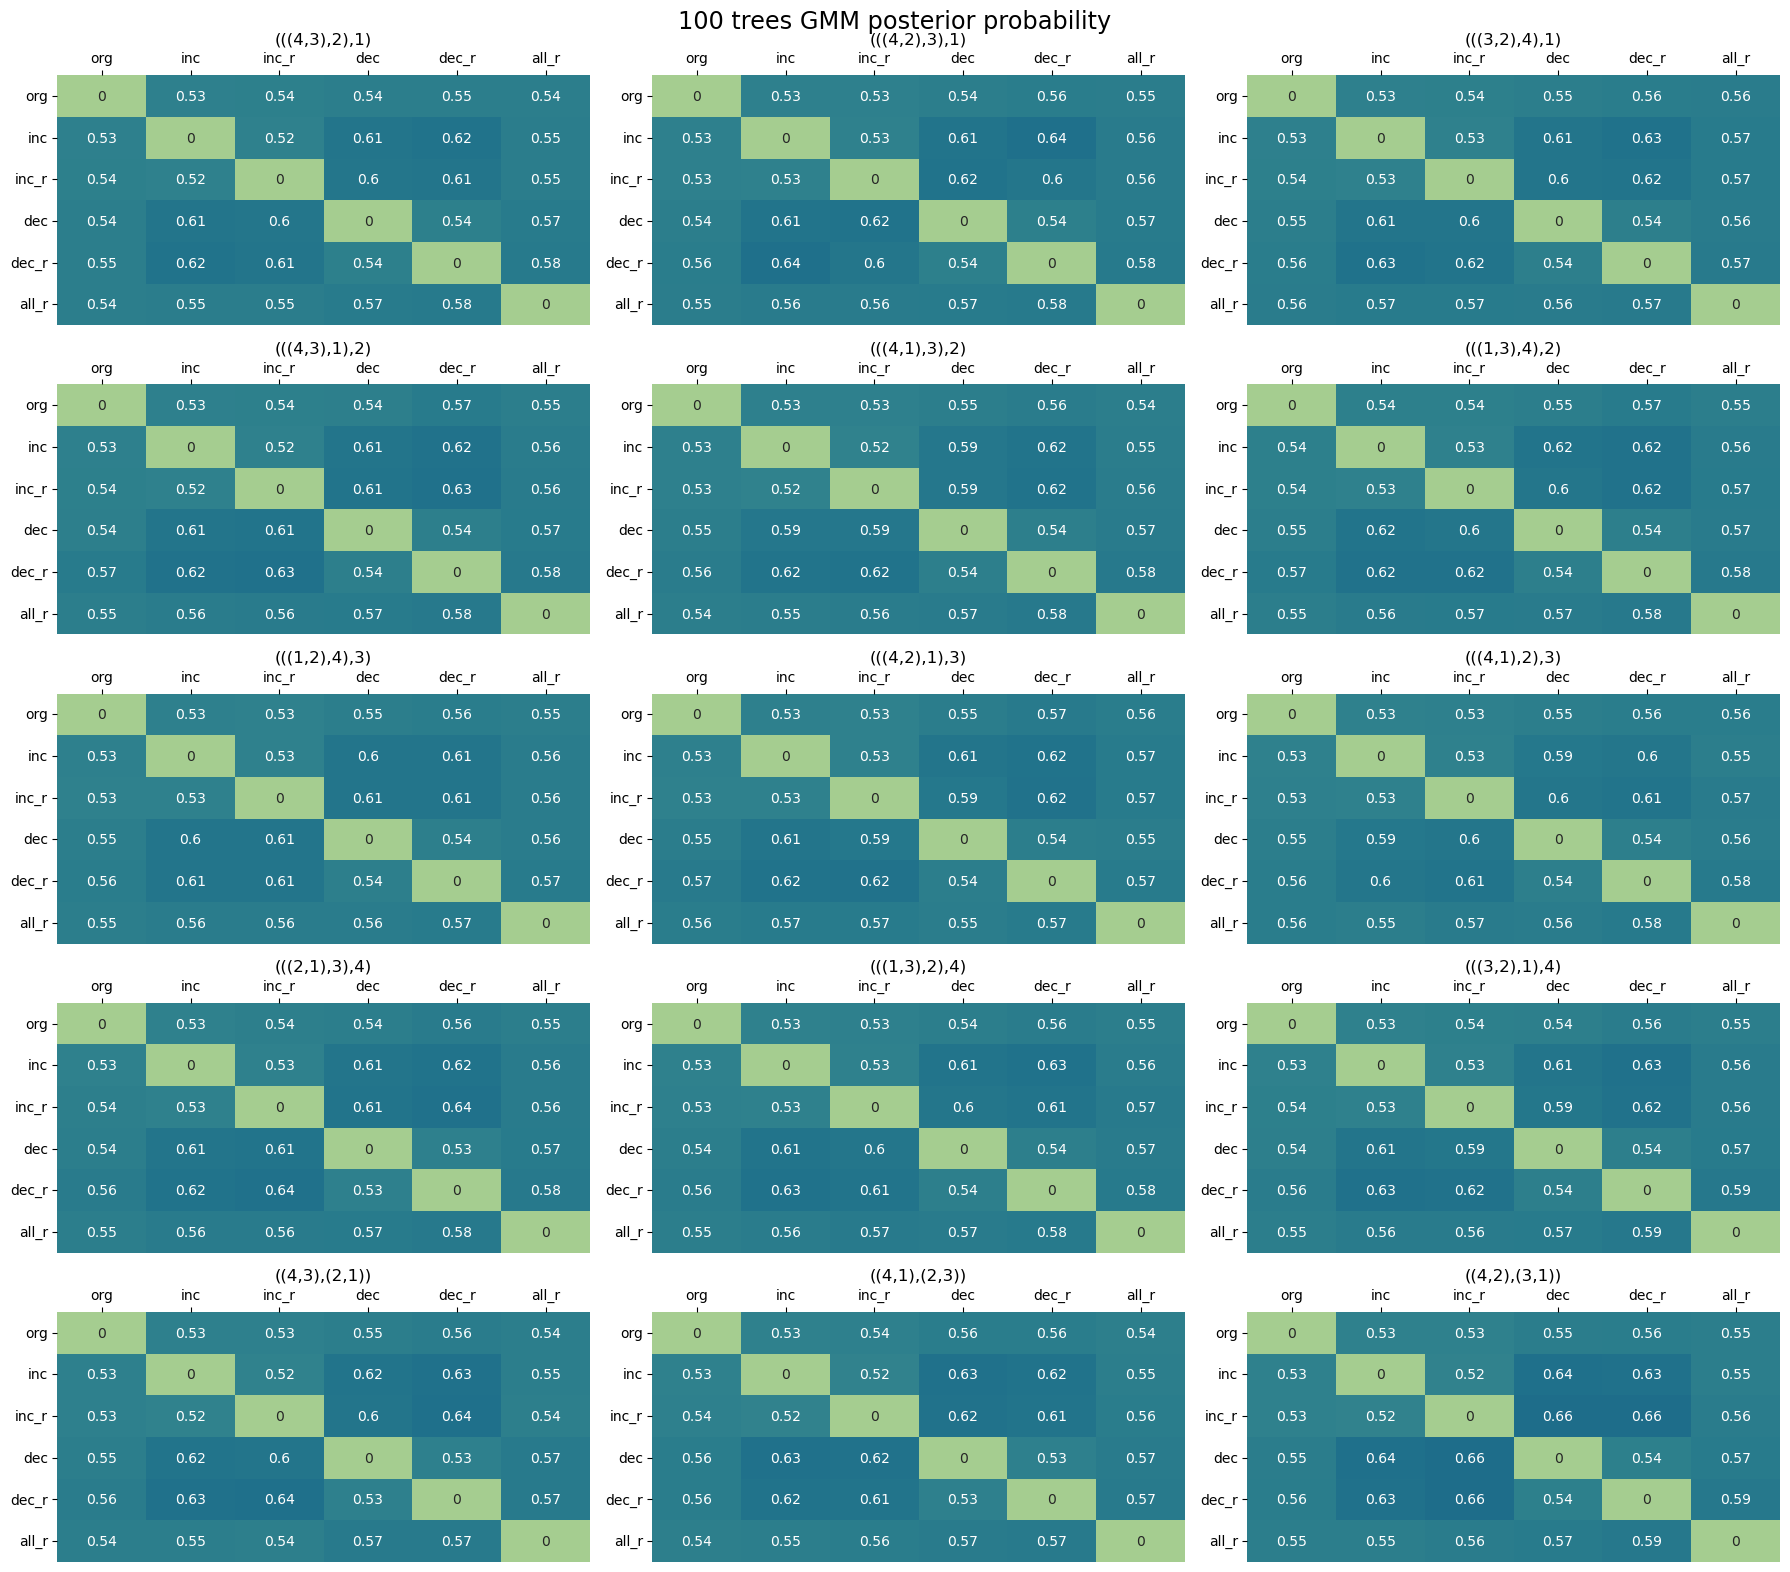

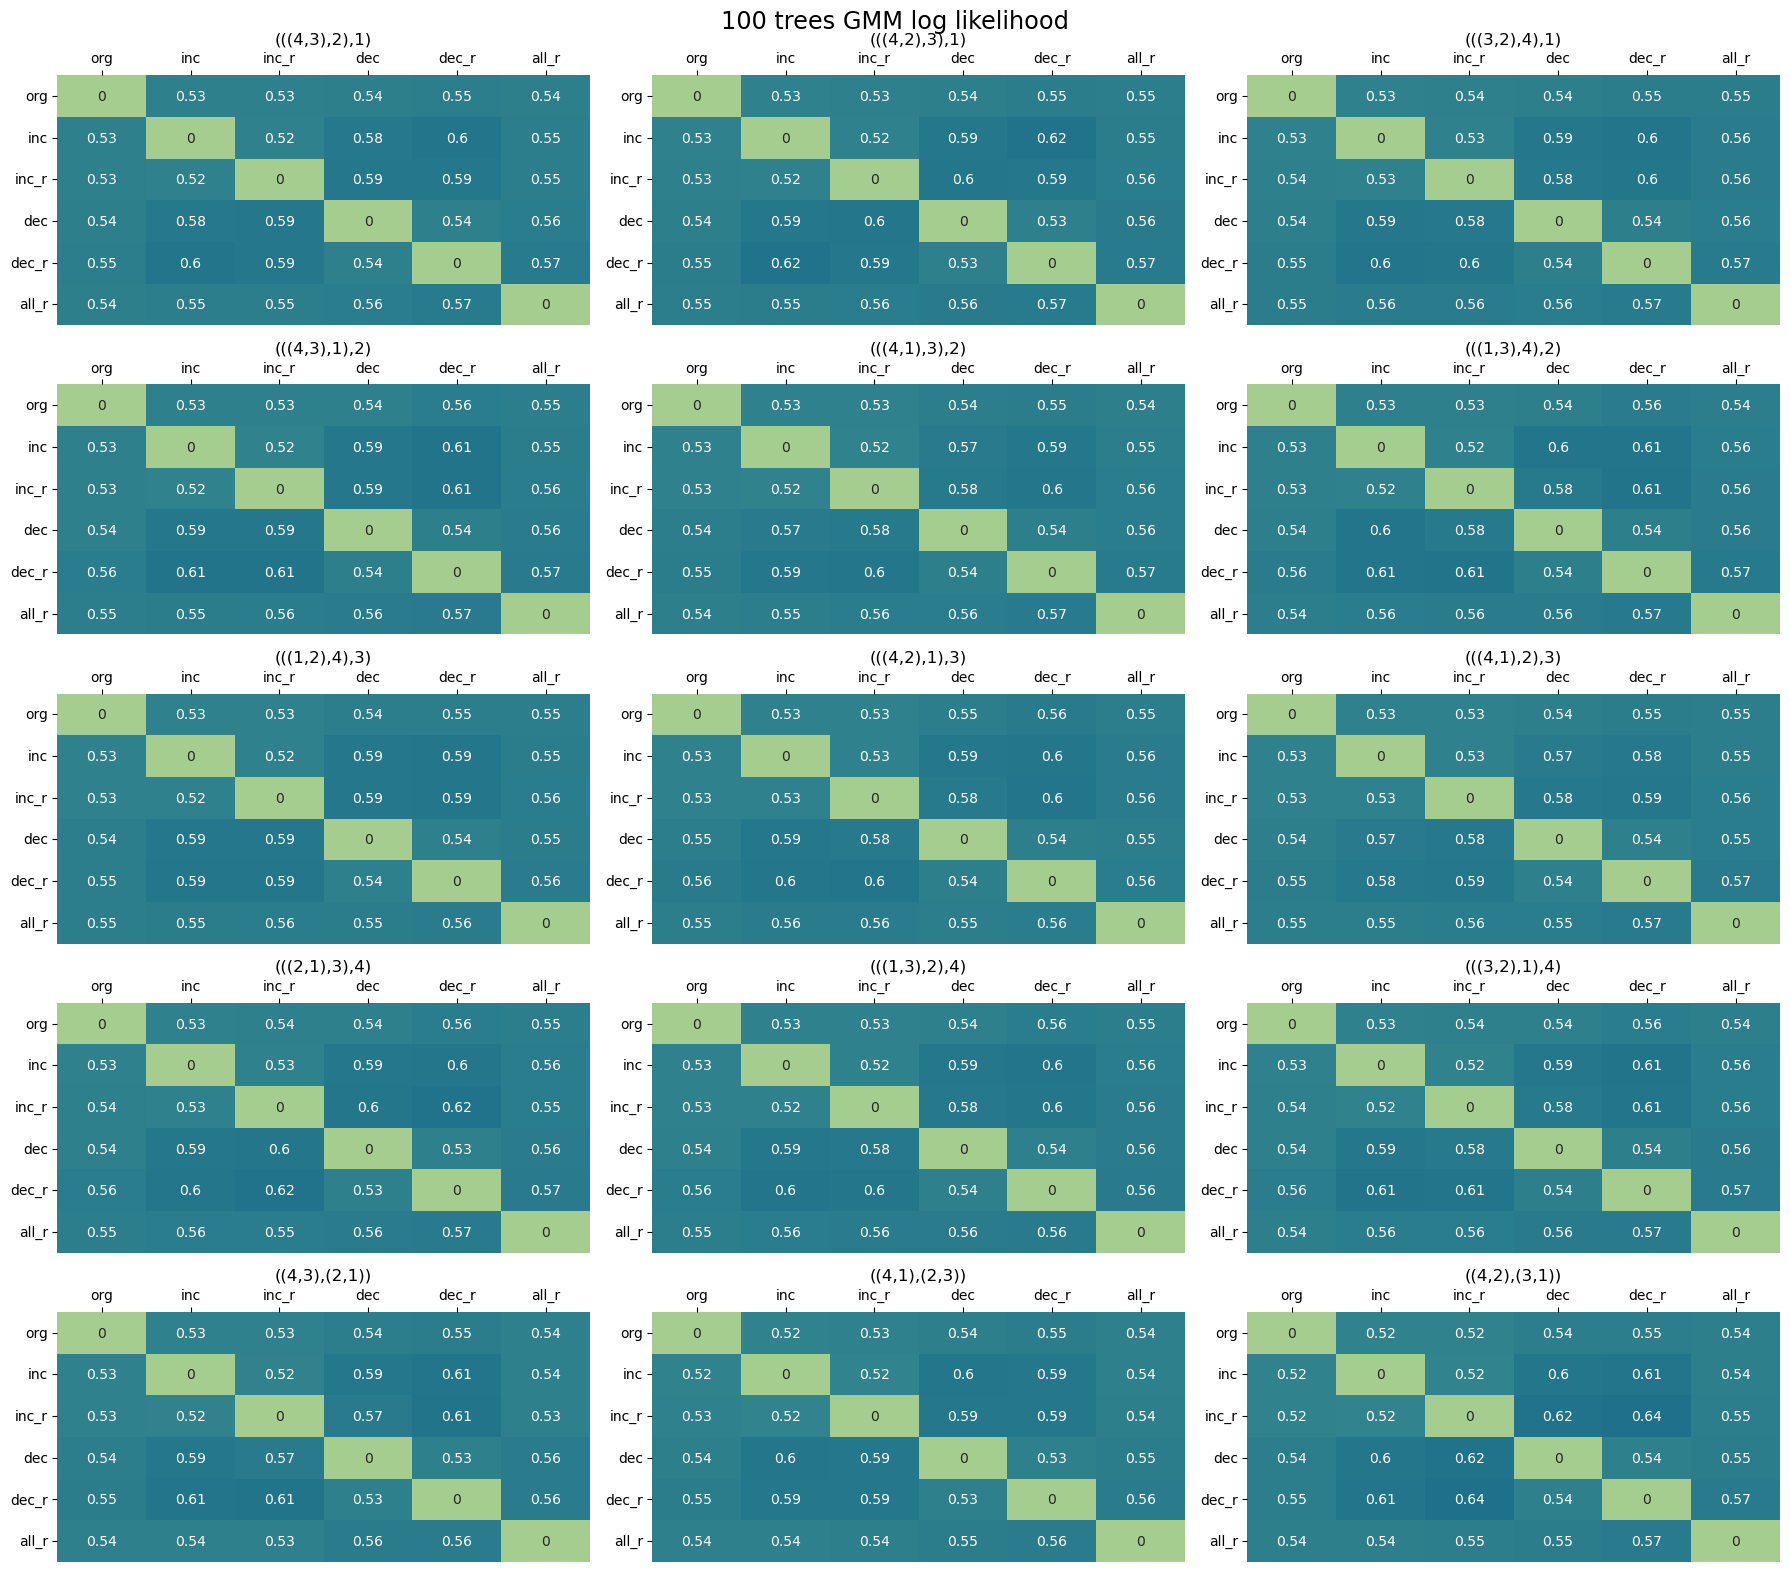

In [25]:
change = ["org","inc","inc_r","dec","dec_r","all_r"]
dfs = []
for i in range(1,16):
    df = pd.read_csv("../../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_" + str(i) + "_100_1.csv")
    accuracy = df.values
    for j in range(99):
        path = "../../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_" + str(i) + "_100_" + str(j + 2) + ".csv"
        df = pd.read_csv(path)
        accuracy += df.values
        
    accuracy /= 100
    df = pd.DataFrame(accuracy)
    df.columns = change
    df.index = change
    dfs.append(df)
    
plot_heatmap(dfs,trees,'100 trees K-means')

dfs = []
for i in range(1,16):
    df = pd.read_csv("../../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_" + str(i) + "_100_1.csv")
    accuracy = df.values
    for j in range(99):
        path = "../../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_" + str(i) + "_100_" + str(j + 2) + ".csv"
        df = pd.read_csv(path)
        accuracy += df.values
    
    accuracy /= 100
    df = pd.DataFrame(accuracy)
    df.columns = change
    df.index = change
    dfs.append(df)
    
plot_heatmap(dfs,trees,'100 trees GMM posterior probability')

dfs = []
for i in range(1,16):
    df = pd.read_csv("../../../data/result/4-taxon/in-tree/GMM/GMM_llpg_4_tree_" + str(i) + "_100_1.csv")
    accuracy = df.values
    for j in range(99):
        path = "../../../data/result/4-taxon/in-tree/GMM/GMM_llpg_4_tree_" + str(i) + "_100_" + str(j + 2) + ".csv"
        df = pd.read_csv(path)
        accuracy += df.values
    
    accuracy /= 100
    df = pd.DataFrame(accuracy)
    df.columns = change
    df.index = change
    dfs.append(df)
    
plot_heatmap(dfs,trees,'100 trees GMM log likelihood')


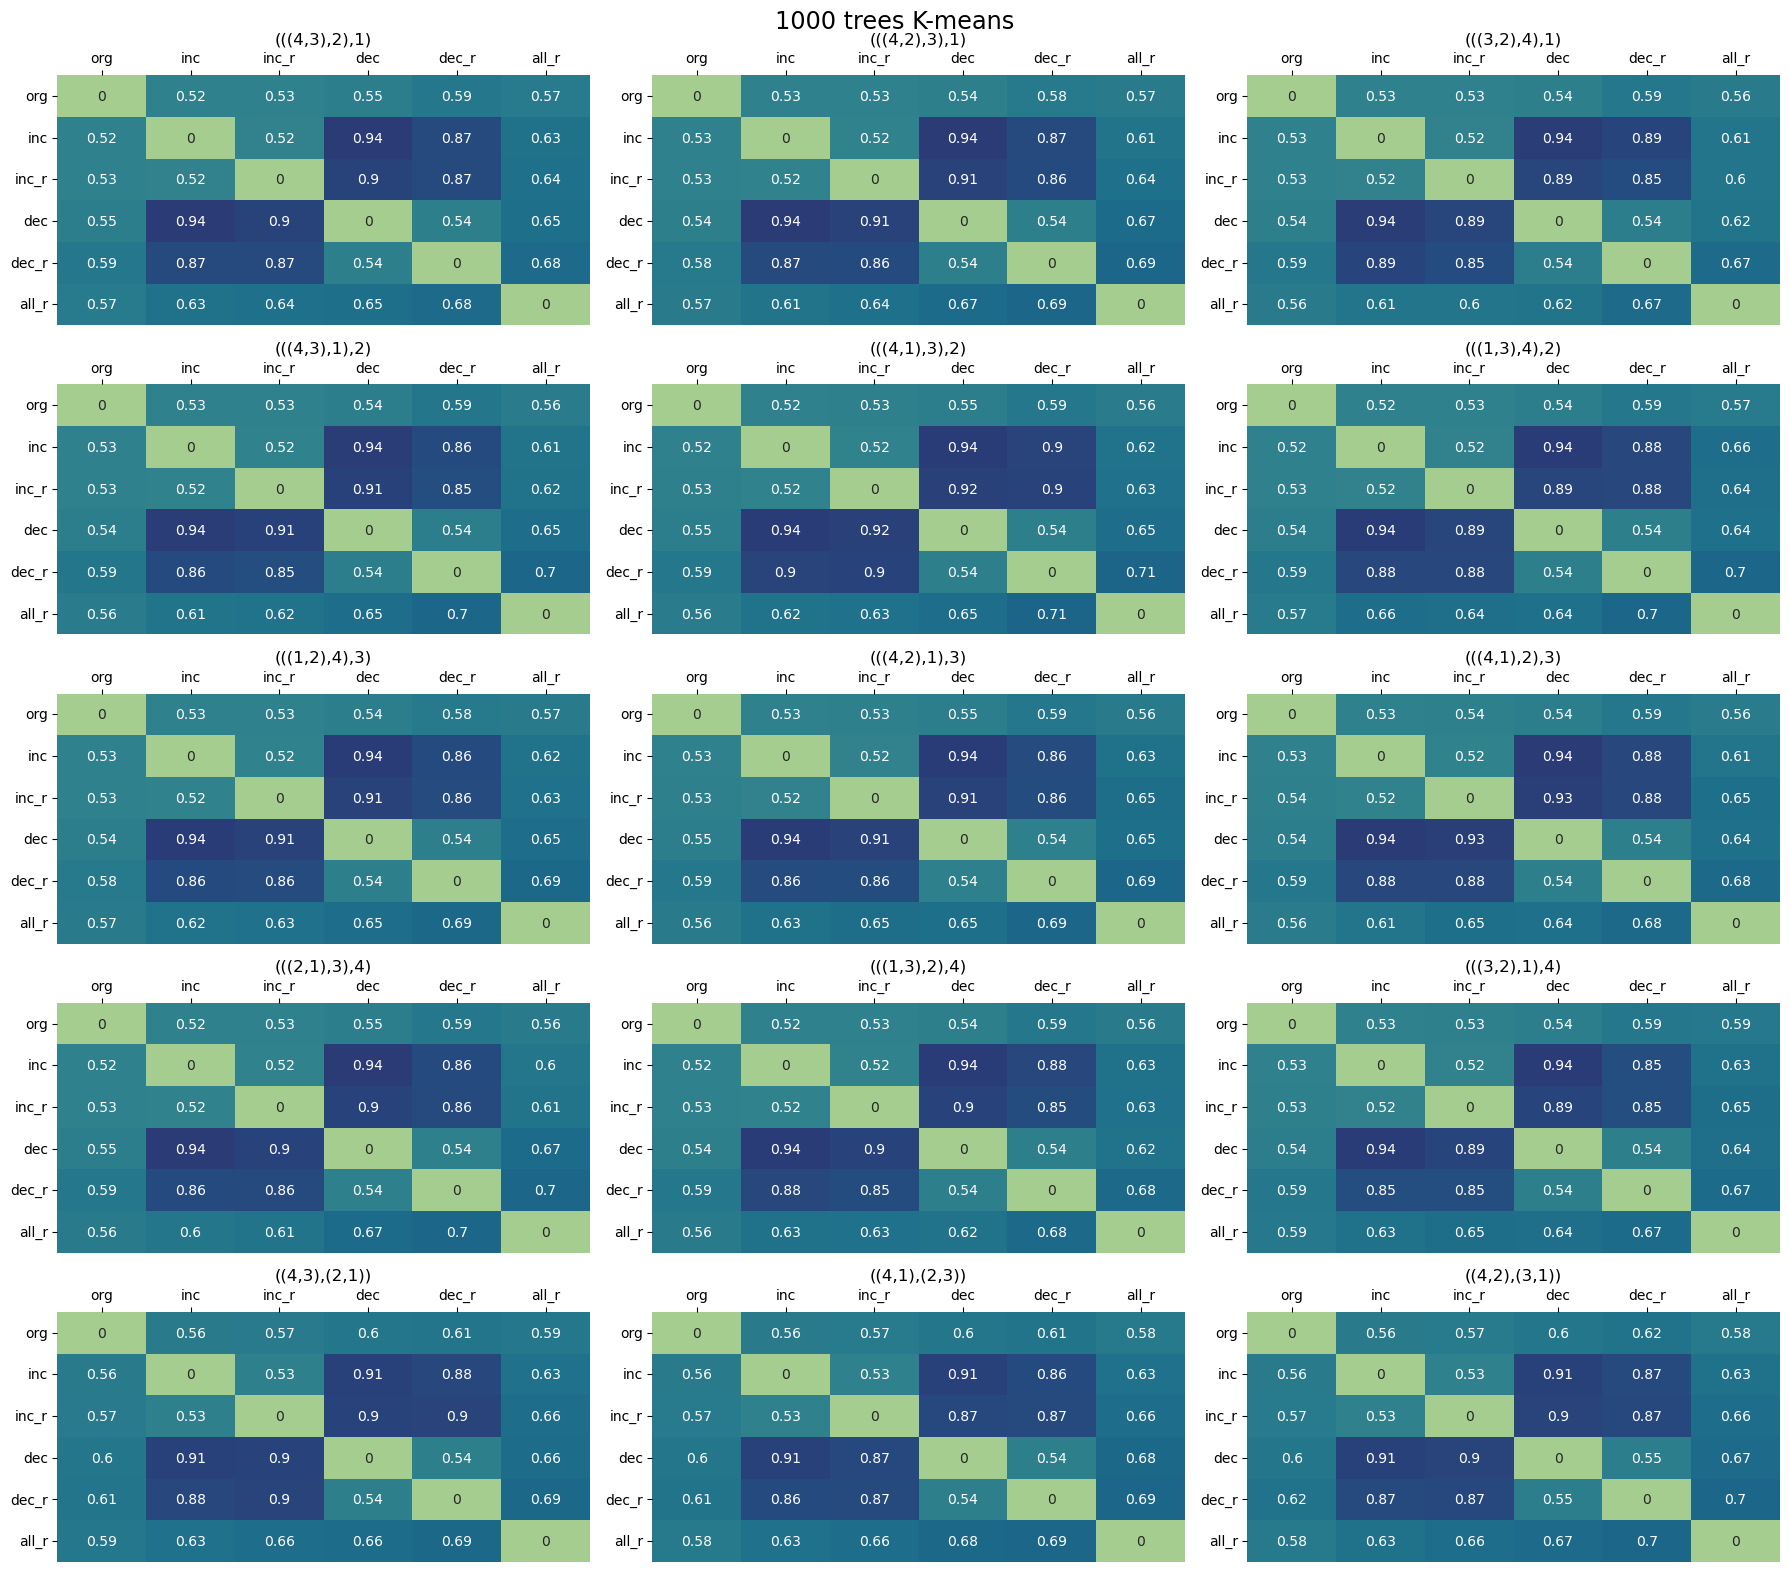

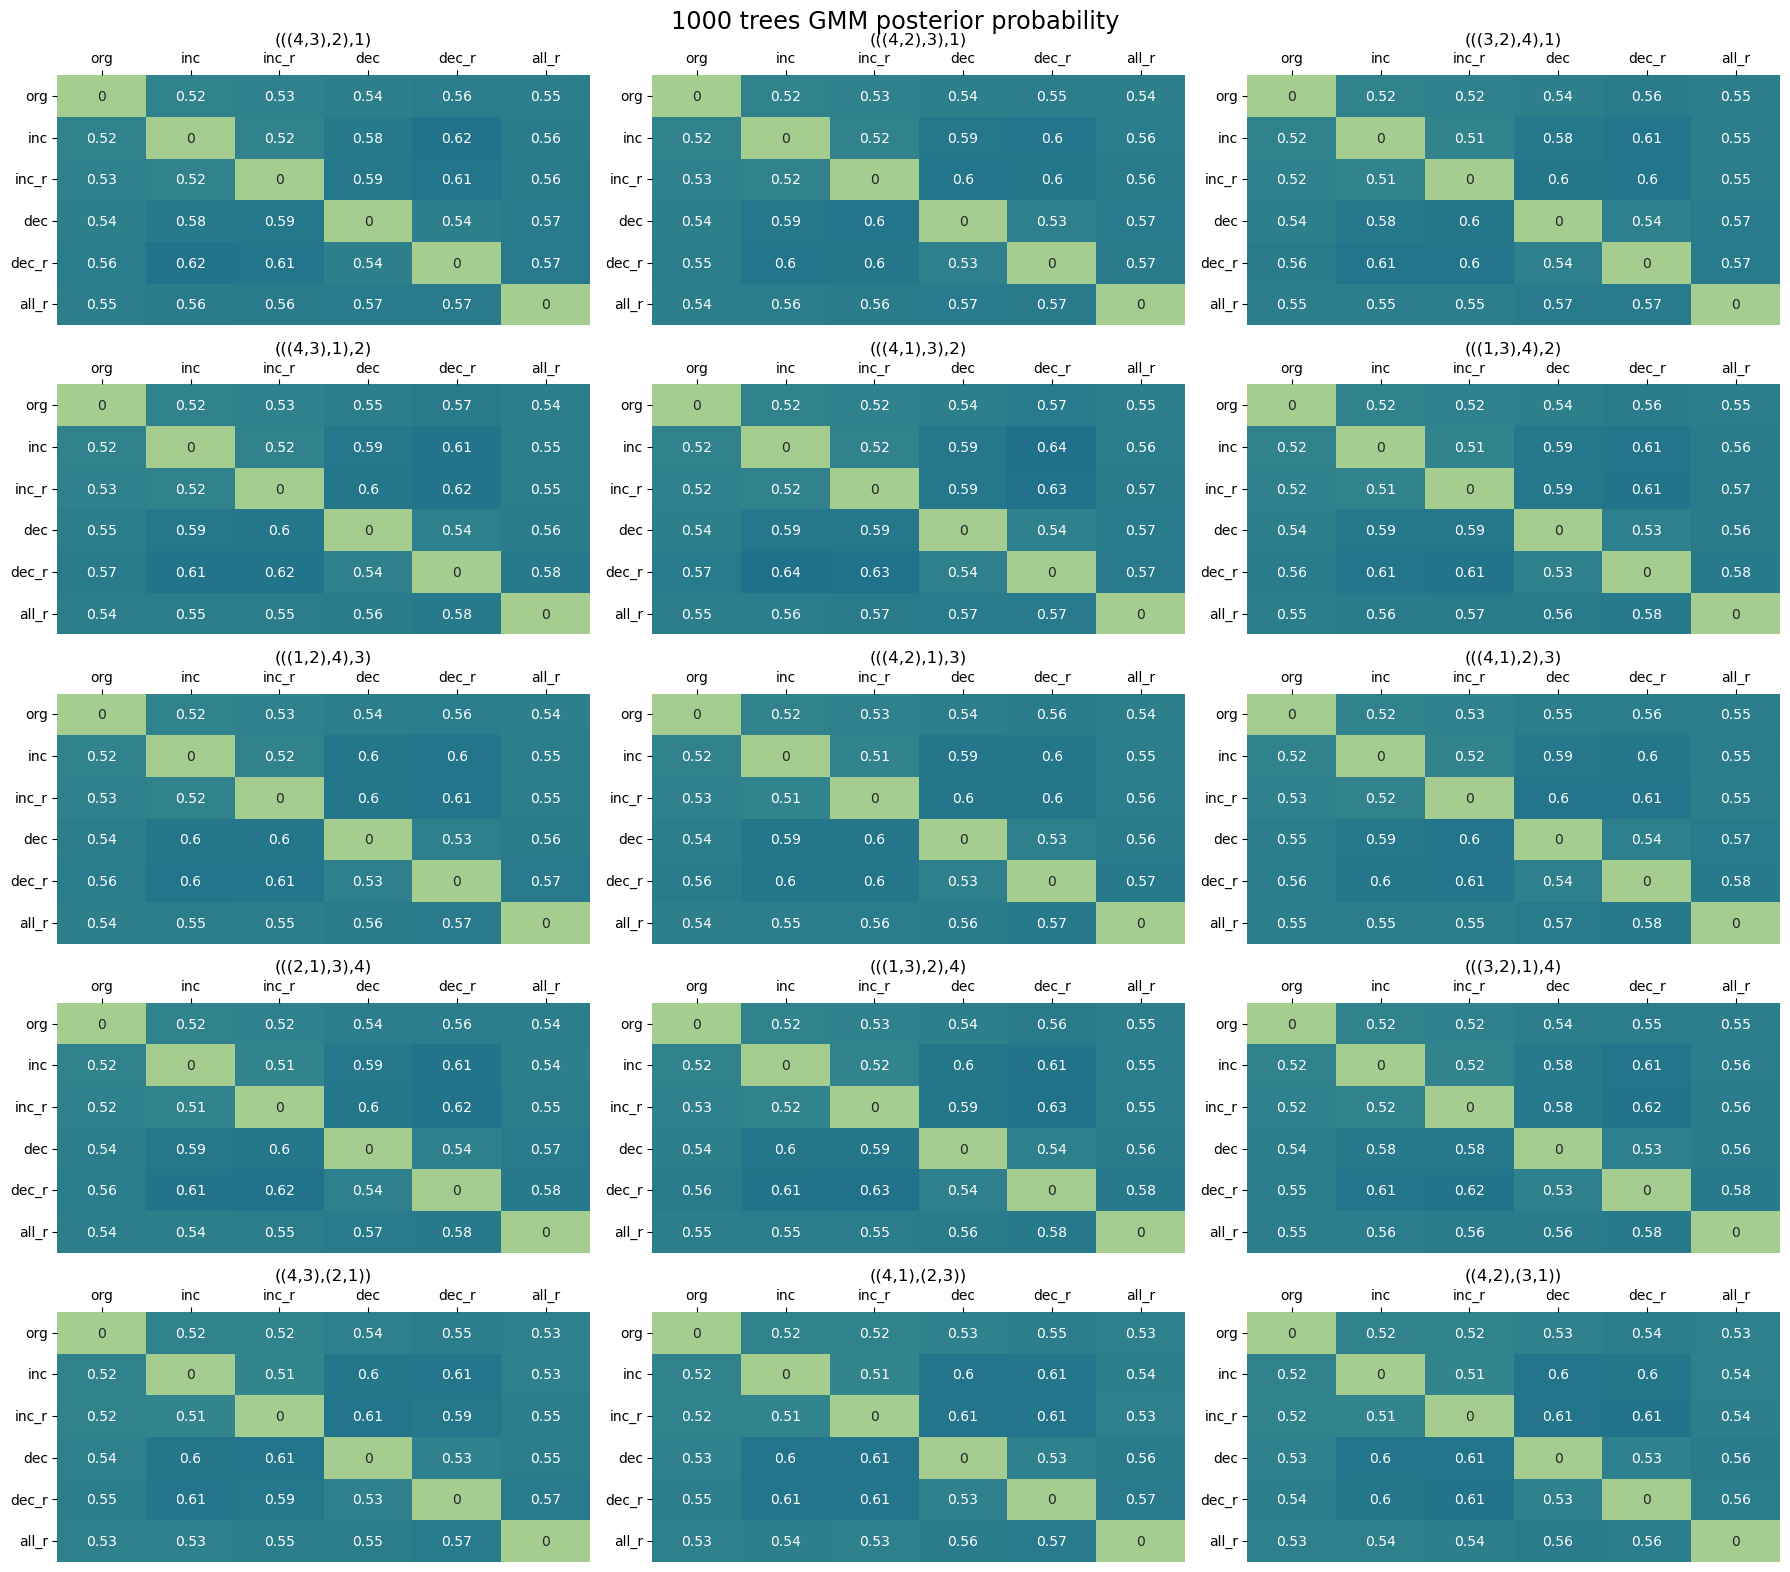

In [24]:
change = ["org","inc","inc_r","dec","dec_r","all_r"]
dfs = []
for i in range(1,16):
    df = pd.read_csv("../../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_" + str(i) + "_1000_1.csv")
    accuracy = df.values
    for j in range(99):
        path = "../../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_" + str(i) + "_1000_" + str(j + 2) + ".csv"
        df = pd.read_csv(path)
        accuracy += df.values
        
    accuracy /= 100
    df = pd.DataFrame(accuracy)
    df.columns = change
    df.index = change
    dfs.append(df)
    
plot_heatmap(dfs,trees,'1000 trees K-means')

dfs = []
for i in range(1,16):
    df = pd.read_csv("../../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_" + str(i) + "_1000_1.csv")
    accuracy = df.values
    for j in range(99):
        path = "../../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_" + str(i) + "_1000_" + str(j + 2) + ".csv"
        df = pd.read_csv(path)
        accuracy += df.values
    
    accuracy /= 100
    df = pd.DataFrame(accuracy)
    df.columns = change
    df.index = change
    dfs.append(df)
    
plot_heatmap(dfs,trees,'1000 trees GMM posterior probability')

dfs = []
for i in range(1,16):
    df = pd.read_csv("../../../data/result/4-taxon/in-tree/GMM/GMM_llpg_4_tree_" + str(i) + "_1000_1.csv")
    accuracy = df.values
    for j in range(99):
        path = "../../../data/result/4-taxon/in-tree/GMM/GMM_llpg_4_tree_" + str(i) + "_1000_" + str(j + 2) + ".csv"
        df = pd.read_csv(path)
        accuracy += df.values
    
    accuracy /= 100
    df = pd.DataFrame(accuracy)
    df.columns = change
    df.index = change
    dfs.append(df)
    
plot_heatmap(dfs,trees,'1000 trees GMM log likelihood')


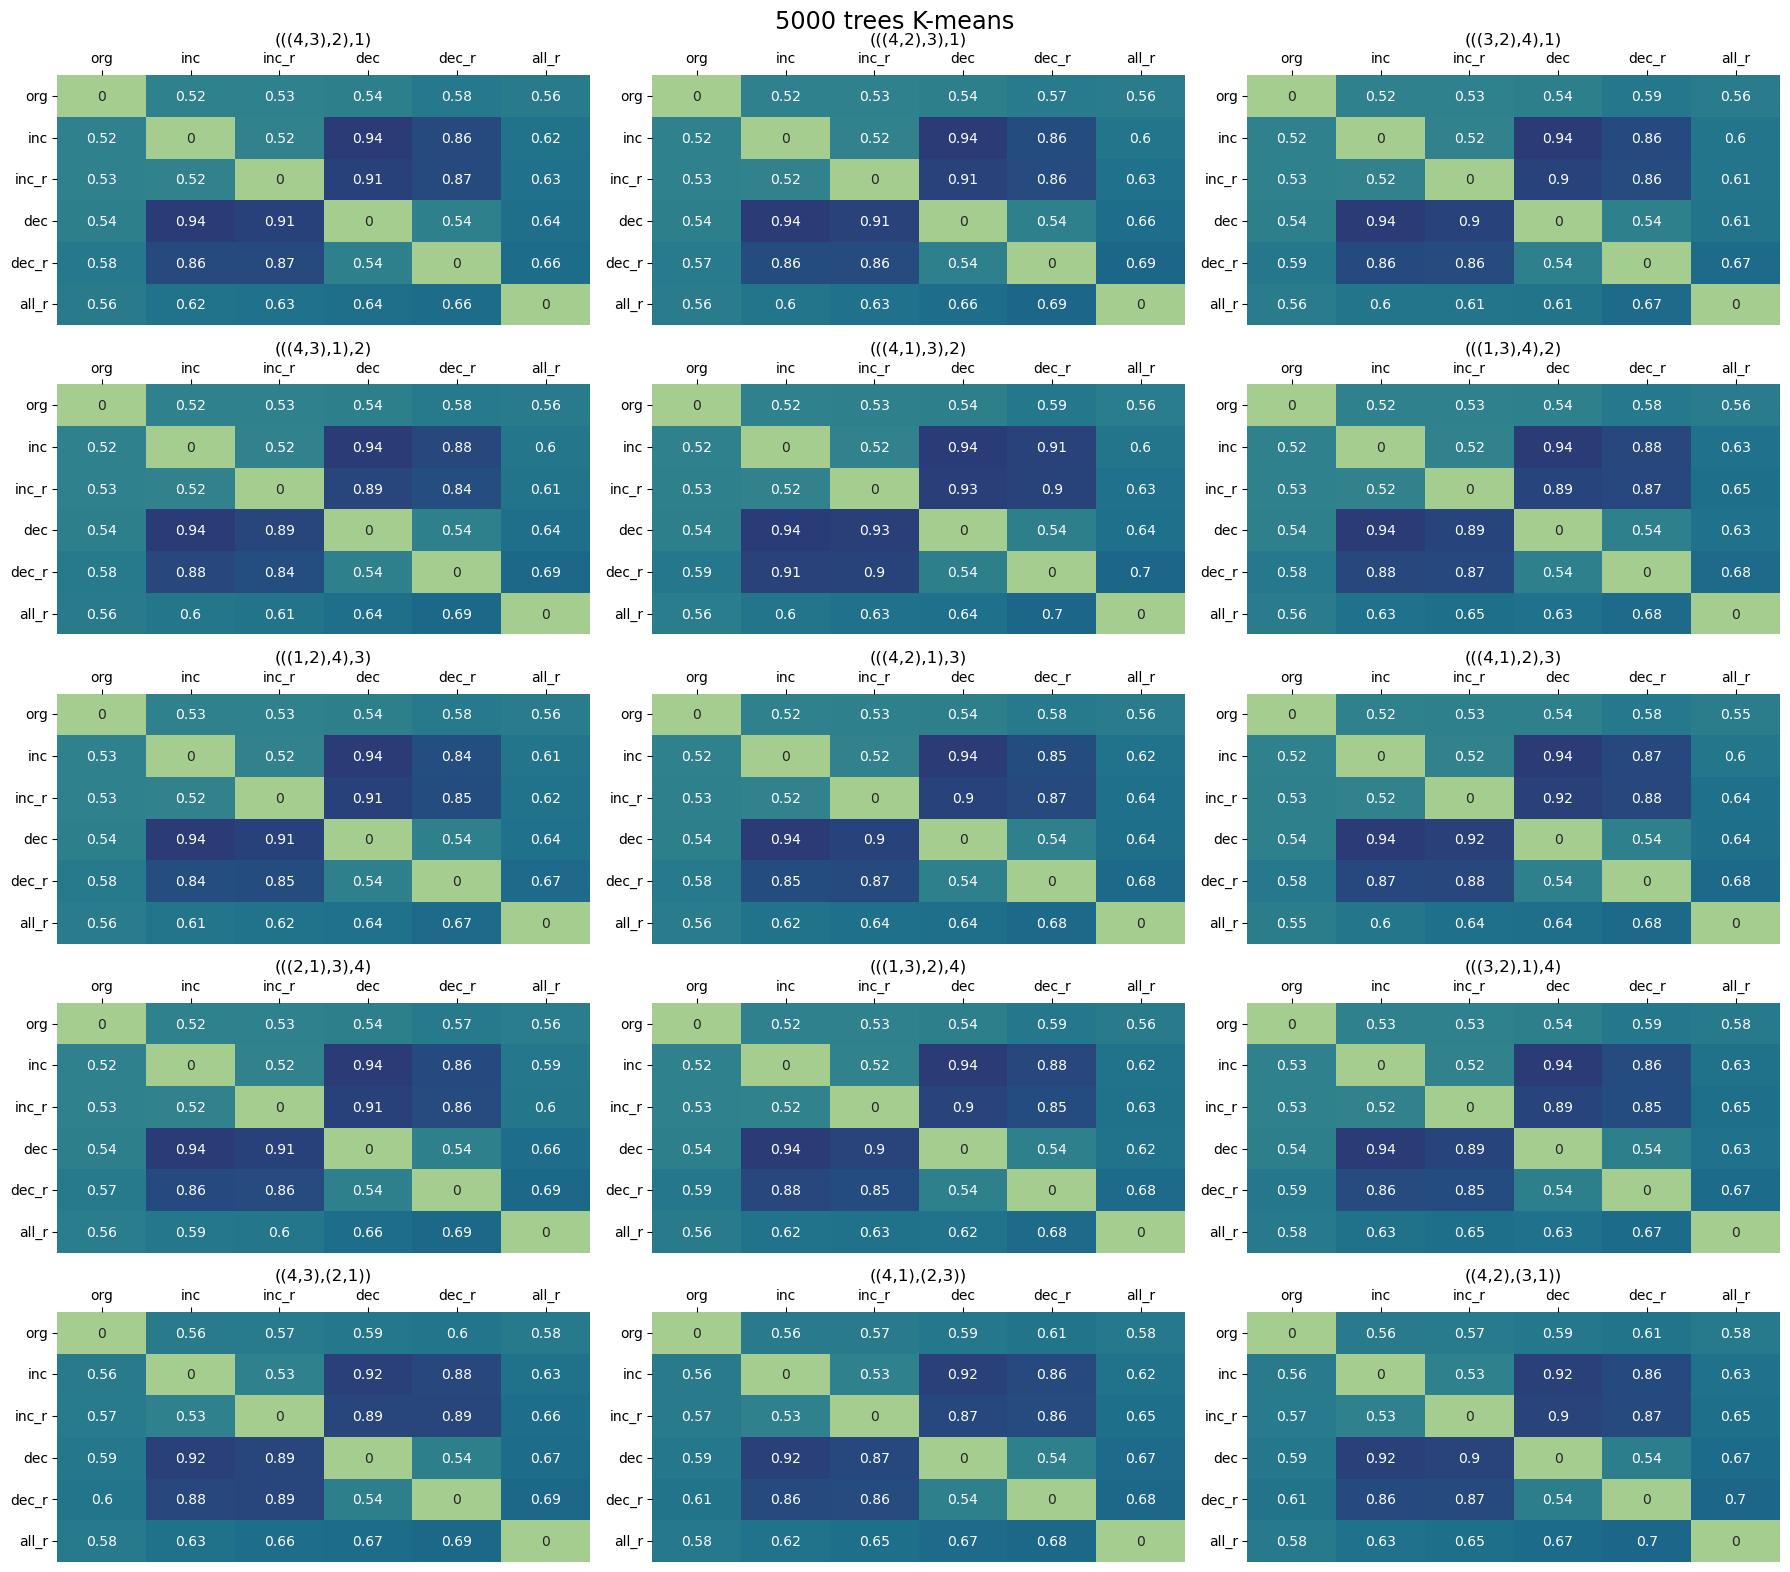

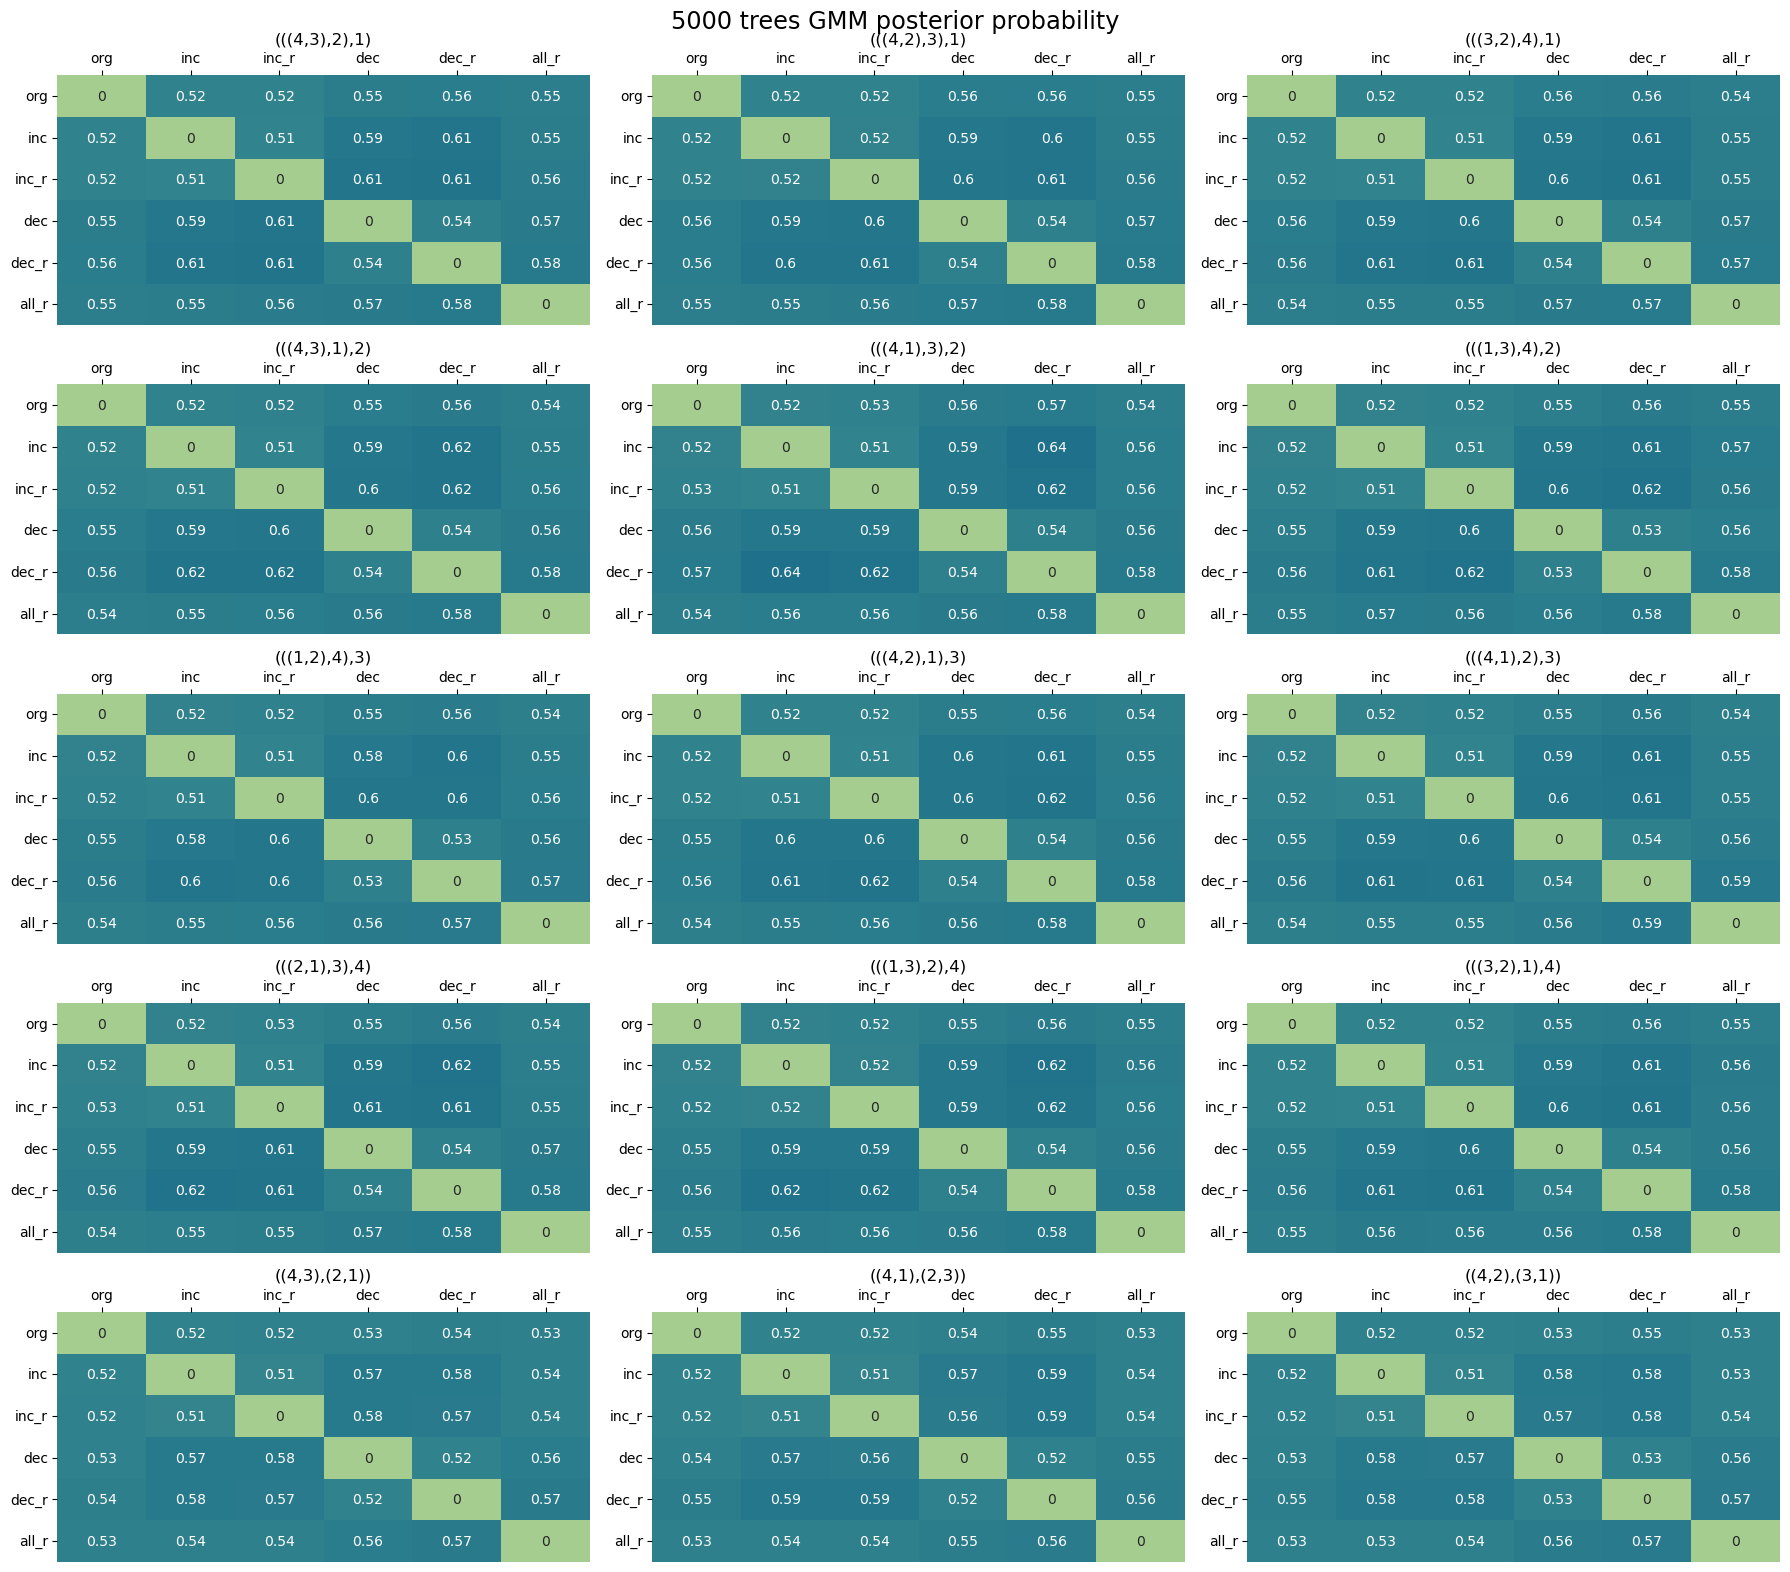

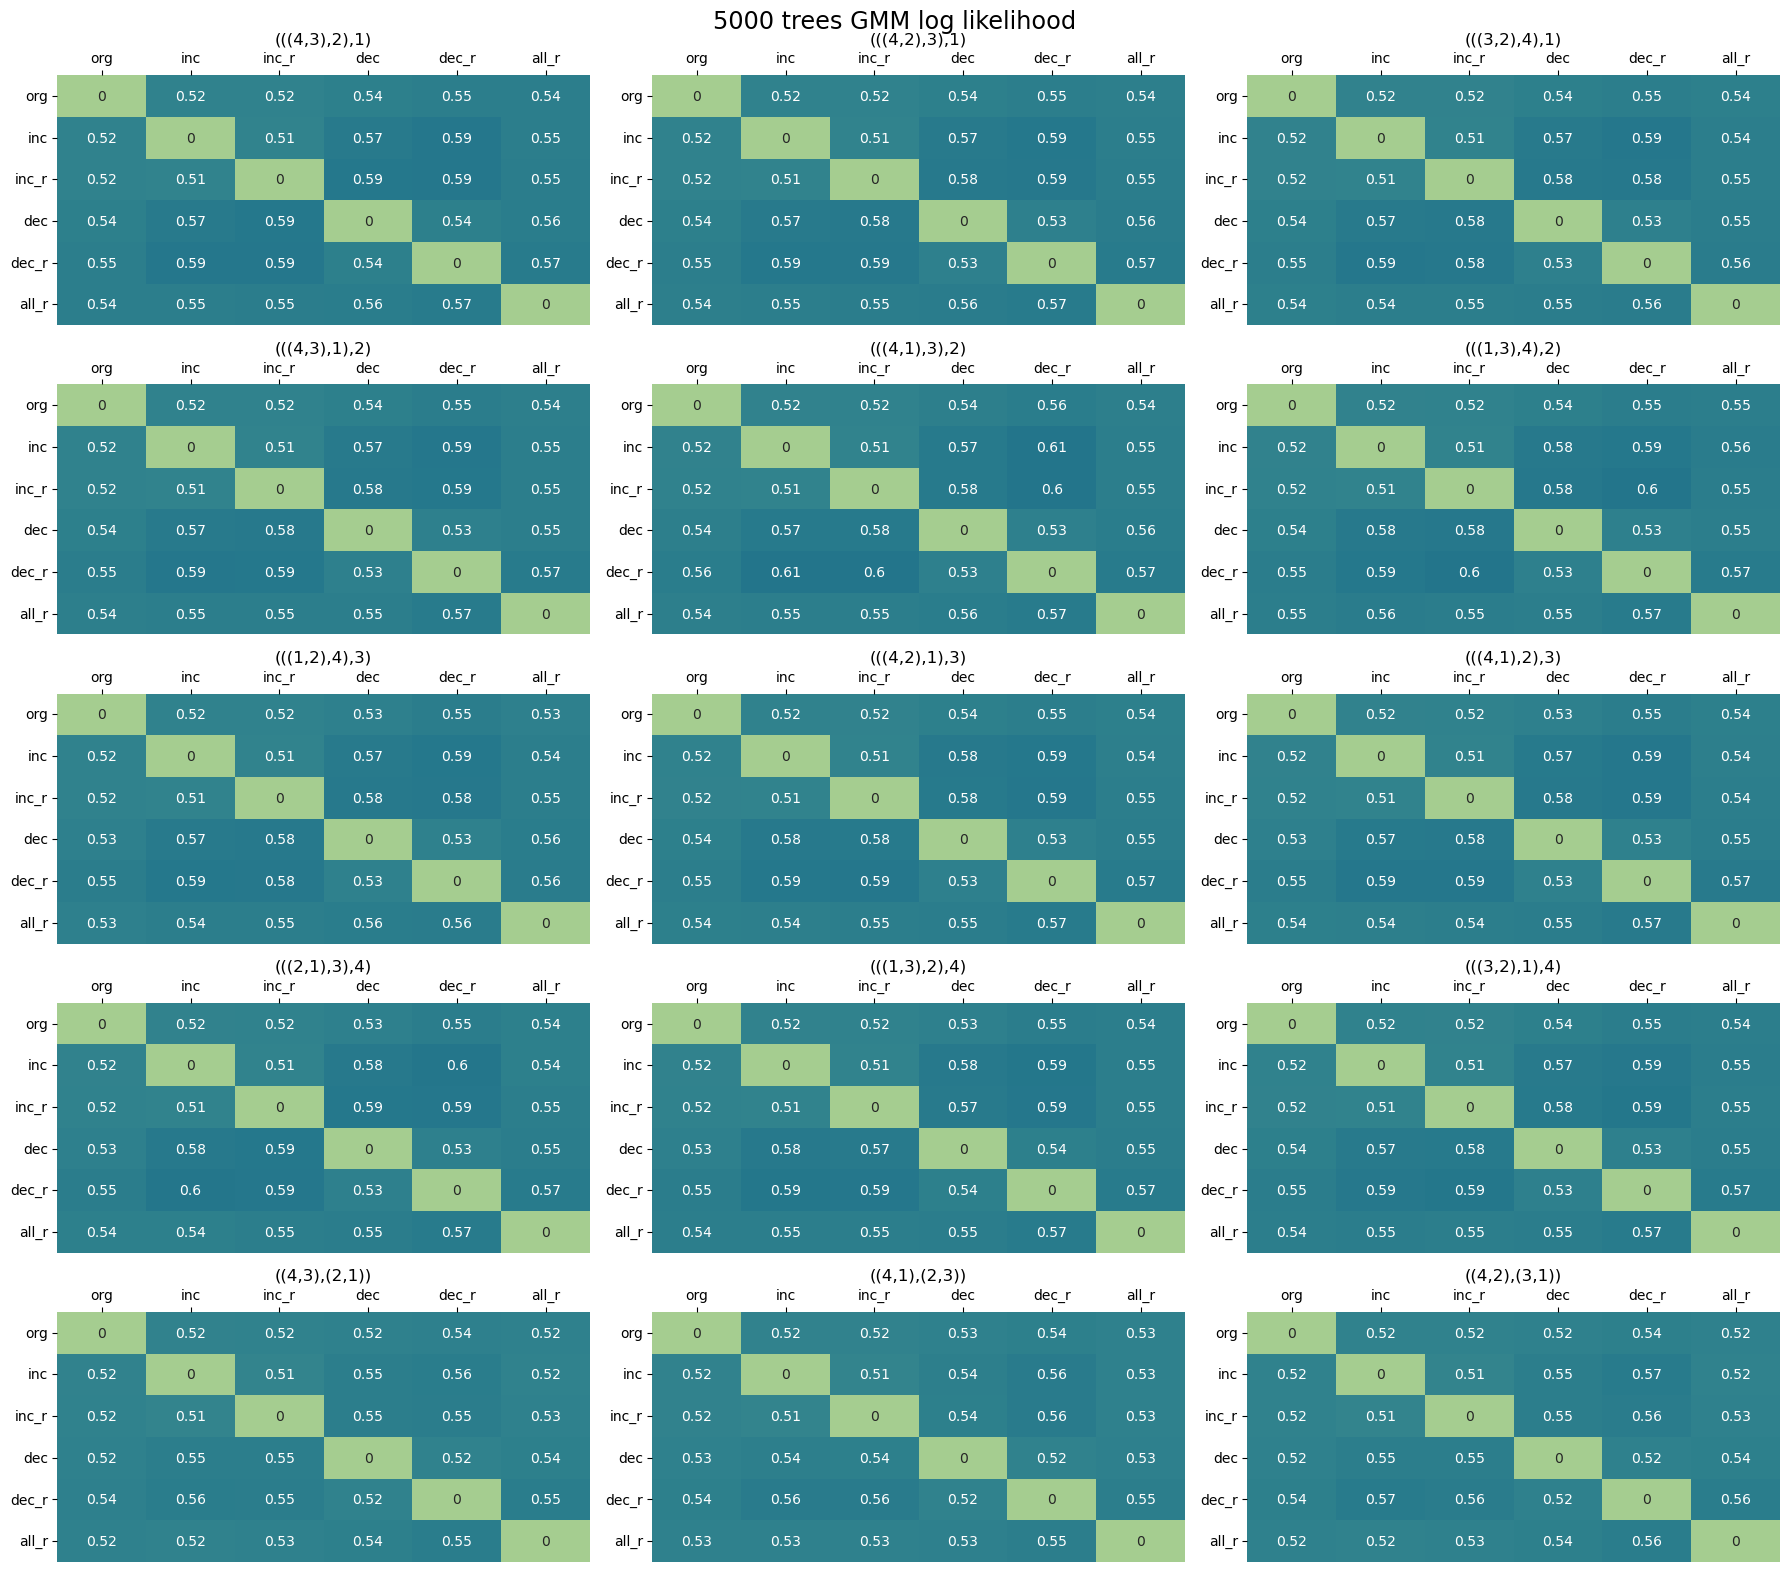

In [23]:
change = ["org","inc","inc_r","dec","dec_r","all_r"]
dfs = []
for i in range(1,16):
    df = pd.read_csv("../../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_" + str(i) + "_5000_1.csv")
    accuracy = df.values
    for j in range(99):
        path = "../../../data/result/4-taxon/in-tree/Kmeans/kmeans_4_tree_" + str(i) + "_5000_" + str(j + 2) + ".csv"
        df = pd.read_csv(path)
        accuracy += df.values
        
    accuracy /= 100
    df = pd.DataFrame(accuracy)
    df.columns = change
    df.index = change
    dfs.append(df)
    
plot_heatmap(dfs,trees,'5000 trees K-means')

dfs = []
for i in range(1,16):
    df = pd.read_csv("../../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_" + str(i) + "_5000_1.csv")
    accuracy = df.values
    for j in range(99):
        path = "../../../data/result/4-taxon/in-tree/GMM/GMM_prob_4_tree_" + str(i) + "_5000_" + str(j + 2) + ".csv"
        df = pd.read_csv(path)
        accuracy += df.values
    
    accuracy /= 100
    df = pd.DataFrame(accuracy)
    df.columns = change
    df.index = change
    dfs.append(df)
    
plot_heatmap(dfs,trees,'5000 trees GMM posterior probability')

dfs = []
for i in range(1,16):
    df = pd.read_csv("../../../data/result/4-taxon/in-tree/GMM/GMM_llpg_4_tree_" + str(i) + "_5000_1.csv")
    accuracy = df.values
    for j in range(99):
        path = "../../../data/result/4-taxon/in-tree/GMM/GMM_llpg_4_tree_" + str(i) + "_5000_" + str(j + 2) + ".csv"
        df = pd.read_csv(path)
        accuracy += df.values
    
    accuracy /= 100
    df = pd.DataFrame(accuracy)
    df.columns = change
    df.index = change
    dfs.append(df)
    
plot_heatmap(dfs,trees,'5000 trees GMM log likelihood')


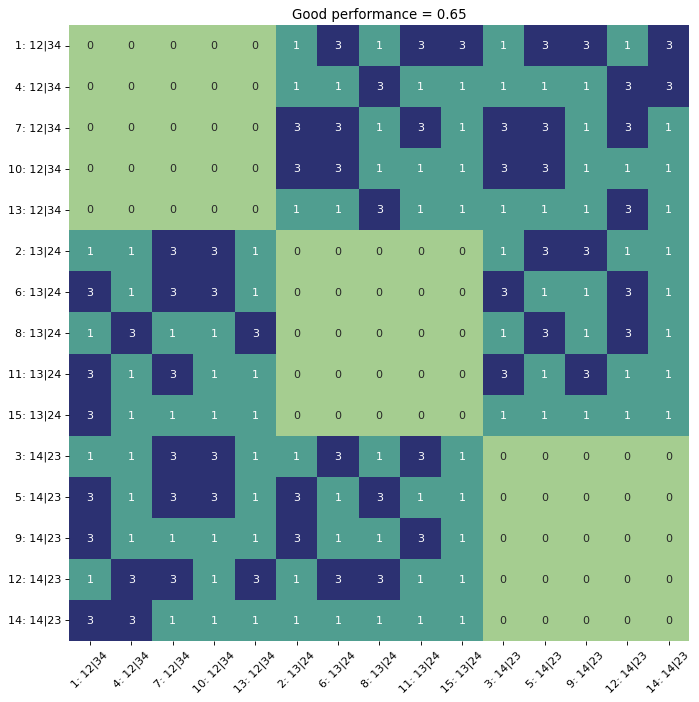

In [17]:
# 100 trees
result_kmeans = kmeans_100.to_numpy()
result_GMM = prob_100.to_numpy()
all_comb = list(combinations(range(0,15),2))
good_kmeans = []
good_GMM = []
good_both = []
bad_both = []
for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    if result_GMM[i,j] >= 0.65 and result_kmeans[i,j] >= 0.65:
        good_both.append(pair)
        good_kmeans.append(pair)
        good_GMM.append(pair)
    elif result_kmeans[i,j] >= 0.65:
        good_kmeans.append(pair)
    elif result_GMM[i,j] >= 0.65:
        good_GMM.append(pair)
    else:
        bad_both.append(pair)
        
matrix = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix[i][j] += 1
    matrix[j][i] += 1

for pair in good_GMM:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix[i][j] += 2
    matrix[j][i] += 2
    
matrix = pd.DataFrame(matrix)
matrix.columns = unrooted
matrix.index = unrooted
matrix = matrix.reindex(newIdx)
matrix = matrix.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.65')
plot = sns.heatmap(matrix, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

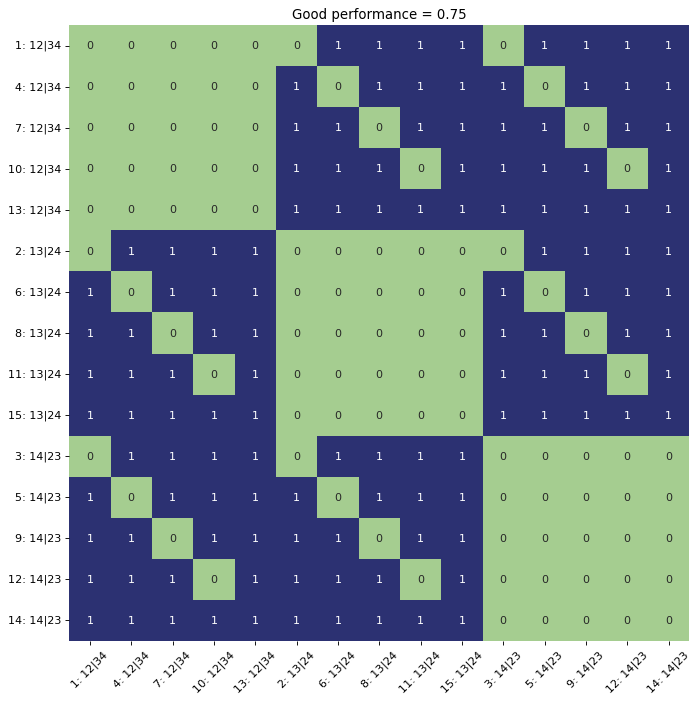

In [18]:
# 100 trees
result_kmeans = kmeans_100.to_numpy()
result_GMM = prob_100.to_numpy()
all_comb = list(combinations(range(0,15),2))
good_kmeans = []
good_GMM = []
good_both = []
bad_both = []
for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    if result_GMM[i,j] >= 0.75 and result_kmeans[i,j] >= 0.75:
        good_both.append(pair)
        good_kmeans.append(pair)
        good_GMM.append(pair)
    elif result_kmeans[i,j] >= 0.75:
        good_kmeans.append(pair)
    elif result_GMM[i,j] >= 0.75:
        good_GMM.append(pair)
    else:
        bad_both.append(pair)
        
matrix = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix[i][j] += 1
    matrix[j][i] += 1

for pair in good_GMM:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix[i][j] += 2
    matrix[j][i] += 2
    
matrix = pd.DataFrame(matrix)
matrix.columns = unrooted
matrix.index = unrooted
matrix = matrix.reindex(newIdx)
matrix = matrix.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.75')
plot = sns.heatmap(matrix, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


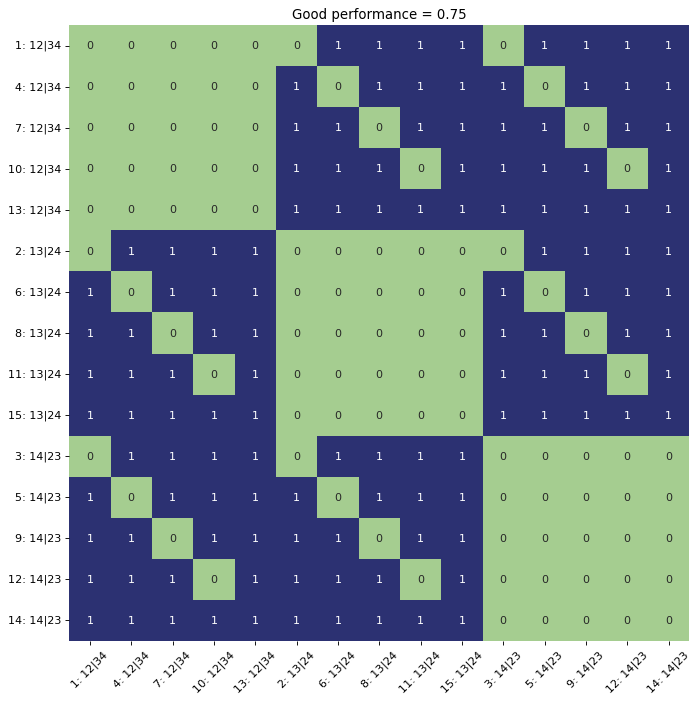

In [11]:
# 1000 trees
result_kmeans = kmeans_1000.to_numpy()
result_GMM = prob_1000.to_numpy()
all_comb = list(combinations(range(0,15),2))
good_kmeans = []
good_GMM = []
good_both = []
bad_both = []
for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    if result_GMM[i,j] >= 0.75 and result_kmeans[i,j] >= 0.75:
        good_both.append(pair)
        good_kmeans.append(pair)
        good_GMM.append(pair)
    elif result_kmeans[i,j] >= 0.75:
        good_kmeans.append(pair)
    elif result_GMM[i,j] >= 0.75:
        good_GMM.append(pair)
    else:
        bad_both.append(pair)
        
matrix = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix[i][j] += 1
    matrix[j][i] += 1

for pair in good_GMM:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix[i][j] += 2
    matrix[j][i] += 2
    
matrix = pd.DataFrame(matrix)
matrix.columns = unrooted
matrix.index = unrooted
matrix = matrix.reindex(newIdx)
matrix = matrix.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.75')
plot = sns.heatmap(matrix, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


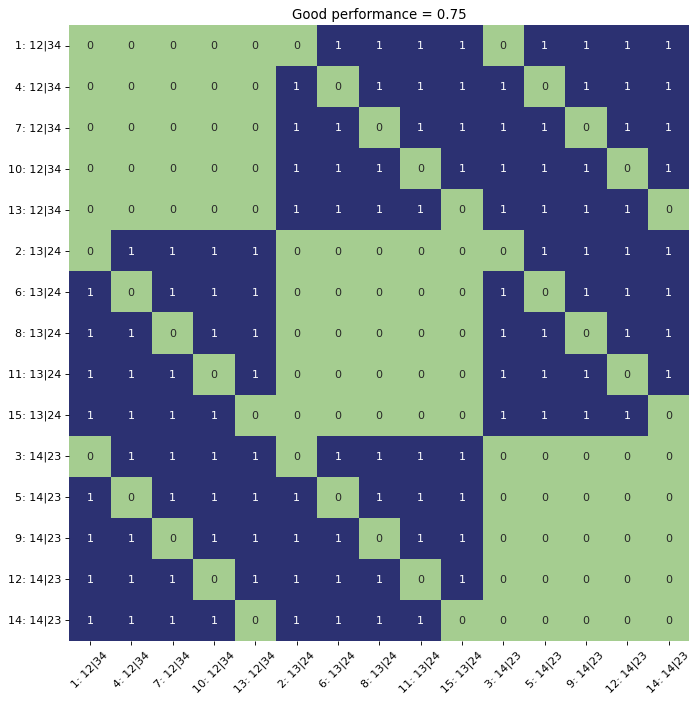

In [20]:
# 5000 trees
result_kmeans = kmeans_5000.to_numpy()
result_GMM = prob_5000.to_numpy()
all_comb = list(combinations(range(0,15),2))
good_kmeans = []
good_GMM = []
good_both = []
bad_both = []
for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    if result_GMM[i,j] >= 0.75 and result_kmeans[i,j] >= 0.75:
        good_both.append(pair)
        good_kmeans.append(pair)
        good_GMM.append(pair)
    elif result_kmeans[i,j] >= 0.75:
        good_kmeans.append(pair)
    elif result_GMM[i,j] >= 0.75:
        good_GMM.append(pair)
    else:
        bad_both.append(pair)
        
matrix = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix[i][j] += 1
    matrix[j][i] += 1

# for pair in good_GMM:
#     i = pair[0] - 1
#     j = pair[1] - 1
#     matrix[i][j] += 2
#     matrix[j][i] += 2
    
matrix = pd.DataFrame(matrix)
matrix.columns = unrooted
matrix.index = unrooted
matrix = matrix.reindex(newIdx)
matrix = matrix.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.75')
plot = sns.heatmap(matrix, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


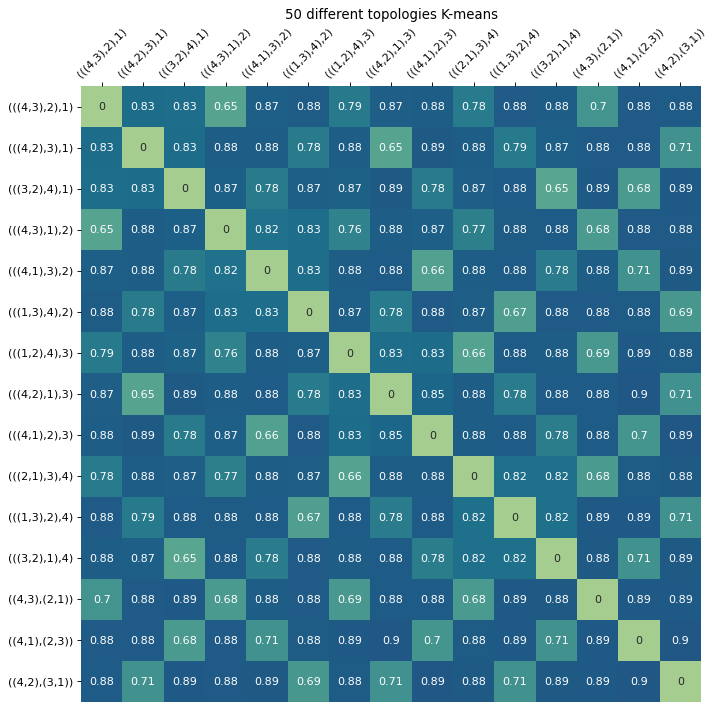

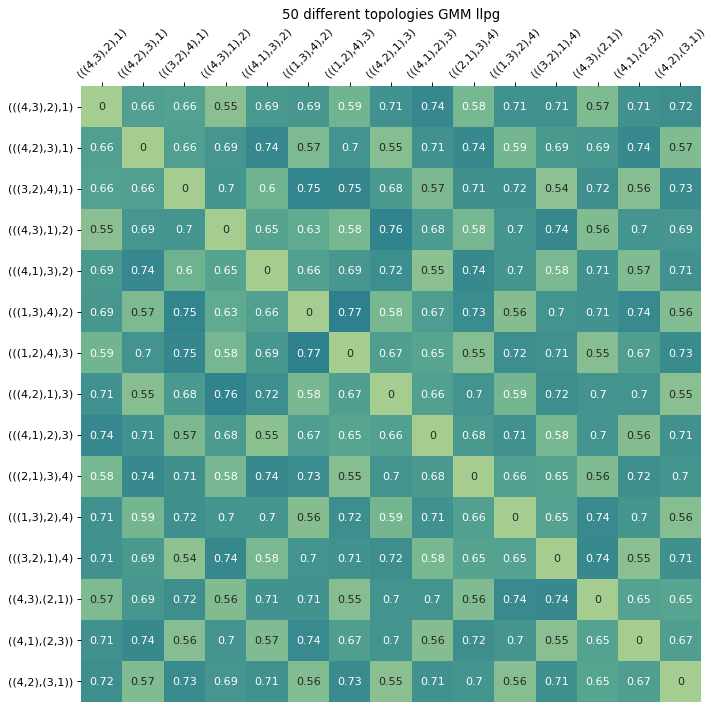

In [48]:
# different topologies with 50 trees

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_50 = pd.DataFrame(accuracy)
diff_kmeans_50.columns = trees
diff_kmeans_50.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('50 different topologies K-means')
plot = sns.heatmap(diff_kmeans_50, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_prob_50 = pd.DataFrame(accuracy)
diff_prob_50.columns = trees
diff_prob_50.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('50 different topologies GMM prob')
plot = sns.heatmap(diff_prob_50, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/GMM/GMM_llpg_4_topo_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/GMM/GMM_llpg_4_topo_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_llpg_50 = pd.DataFrame(accuracy)
diff_llpg_50.columns = trees
diff_llpg_50.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('50 different topologies GMM llpg')
plot = sns.heatmap(diff_llpg_50, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

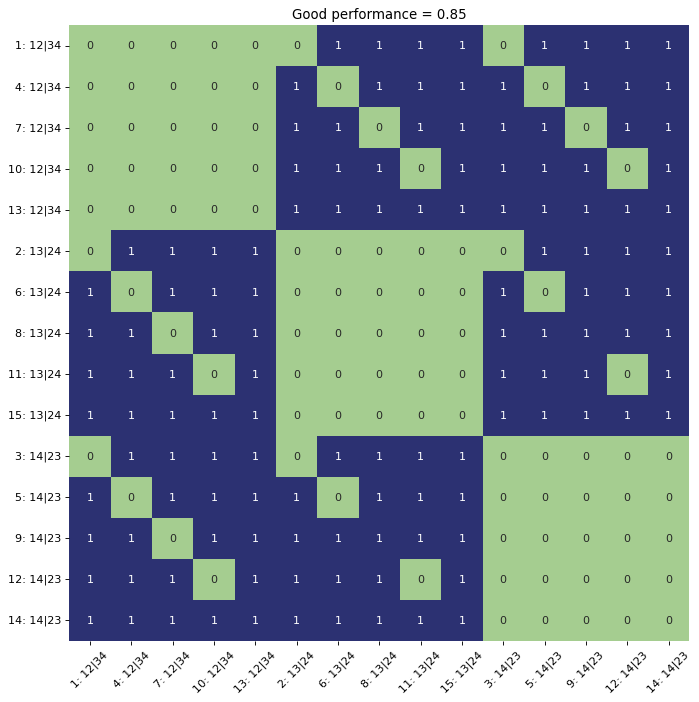

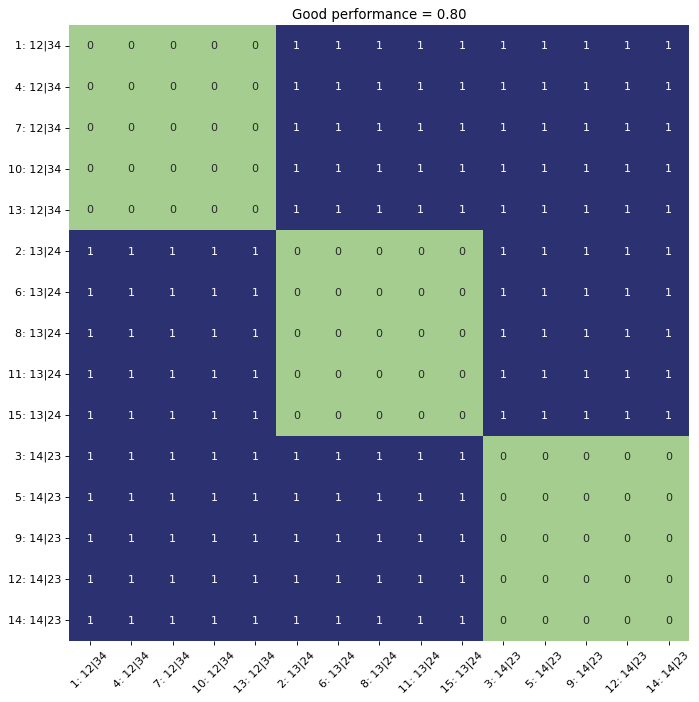

In [27]:
result_kmeans = diff_kmeans_50.to_numpy()
result_GMM = diff_prob_50.to_numpy()
all_comb = list(combinations(range(0,15),2))

good_kmeans_85 = []
good_GMM_85 = []

good_kmeans_80 = []
good_GMM_80 = []

good_kmeans_75 = []
good_GMM_75 = []

for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    
    if result_kmeans[i,j] >= 0.85:
        good_kmeans_85.append(pair)
    if result_GMM[i,j] >= 0.85:
        good_GMM_85.append(pair)
    
    if result_kmeans[i,j] >= 0.8:
        good_kmeans_80.append(pair)
    if result_GMM[i,j] >= 0.8:
        good_GMM_80.append(pair)
        
    if result_kmeans[i,j] >= 0.75:
        good_kmeans_75.append(pair)
    if result_GMM[i,j] >= 0.75:
        good_GMM_75.append(pair)

matrix_85 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_85:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_85[i][j] += 1
    matrix_85[j][i] += 1

for pair in good_GMM_85:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_85[i][j] += 2
    matrix_85[j][i] += 2
    
matrix_85 = pd.DataFrame(matrix_85)
matrix_85.columns = unrooted
matrix_85.index = unrooted
matrix_85 = matrix_85.reindex(newIdx)
matrix_85 = matrix_85.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.85')
plot = sns.heatmap(matrix_85, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

# accuracy >= 0.8
matrix_80 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_80:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_80[i][j] += 1
    matrix_80[j][i] += 1

for pair in good_GMM_80:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_80[i][j] += 2
    matrix_80[j][i] += 2
    
matrix_80 = pd.DataFrame(matrix_80)
matrix_80.columns = unrooted
matrix_80.index = unrooted
matrix_80 = matrix_80.reindex(newIdx)
matrix_80 = matrix_80.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.80')
plot = sns.heatmap(matrix_80, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

# accuracy >= 0.75
matrix_75 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_75:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_75[i][j] += 1
    matrix_75[j][i] += 1

for pair in good_GMM_75:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_75[i][j] += 2
    matrix_75[j][i] += 2
    
matrix_75 = pd.DataFrame(matrix_75)
matrix_75.columns = unrooted
matrix_75.index = unrooted
matrix_75 = matrix_75.reindex(newIdx)
matrix_75 = matrix_75.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.75')
plot = sns.heatmap(matrix_75, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


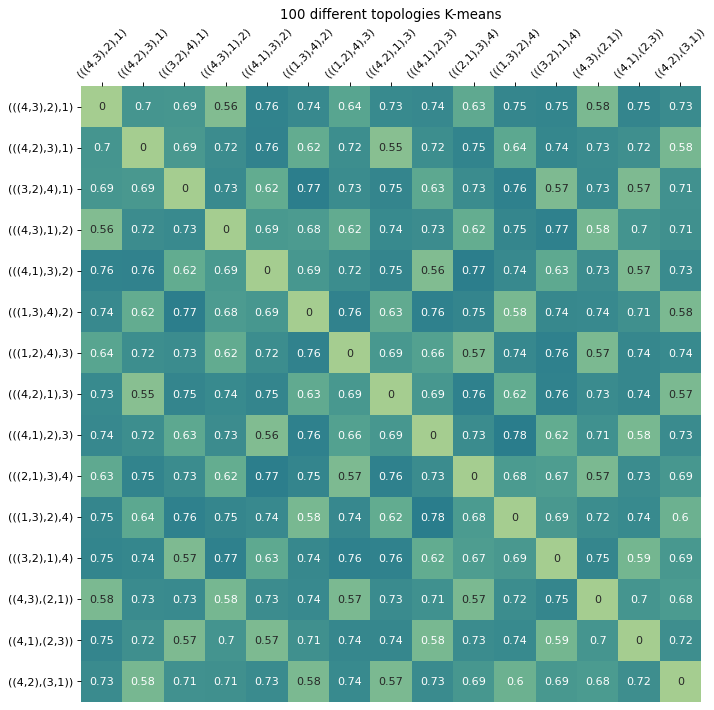

In [71]:
df = pd.read_csv("../../../data/result/4-taxon/diff-topo/rawKmeans/kmeans_4_diff_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/rawKmeans/kmeans_4_diff_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_100 = pd.DataFrame(accuracy)
diff_kmeans_100.columns = trees
diff_kmeans_100.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('100 different topologies K-means')
plot = sns.heatmap(diff_kmeans_100, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

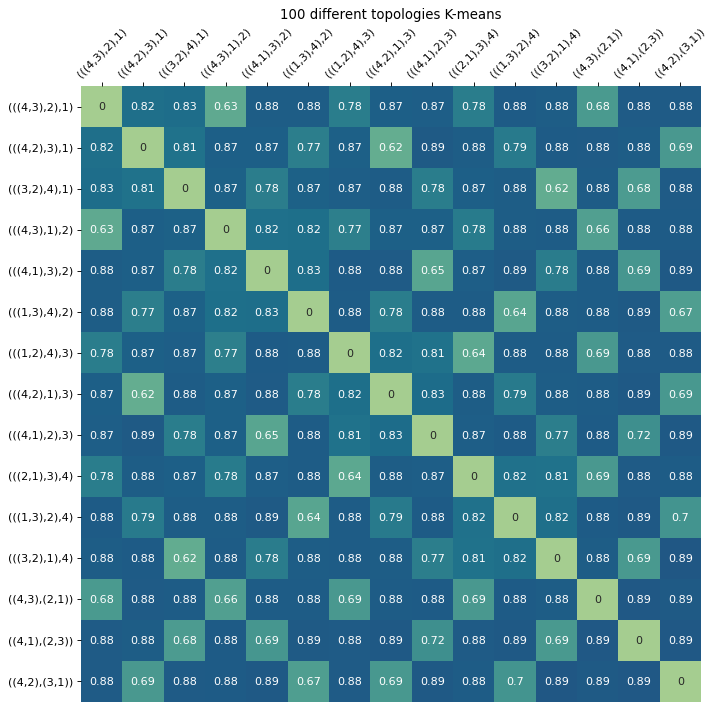

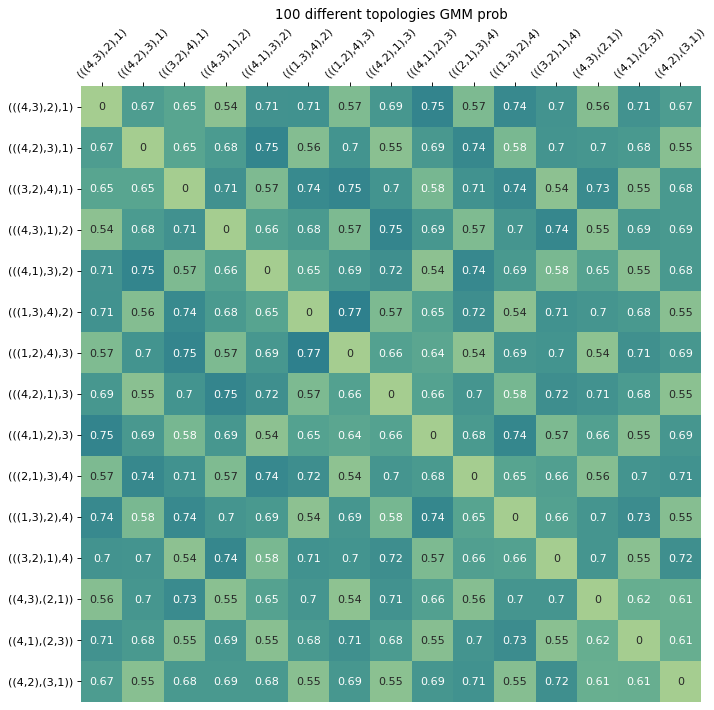

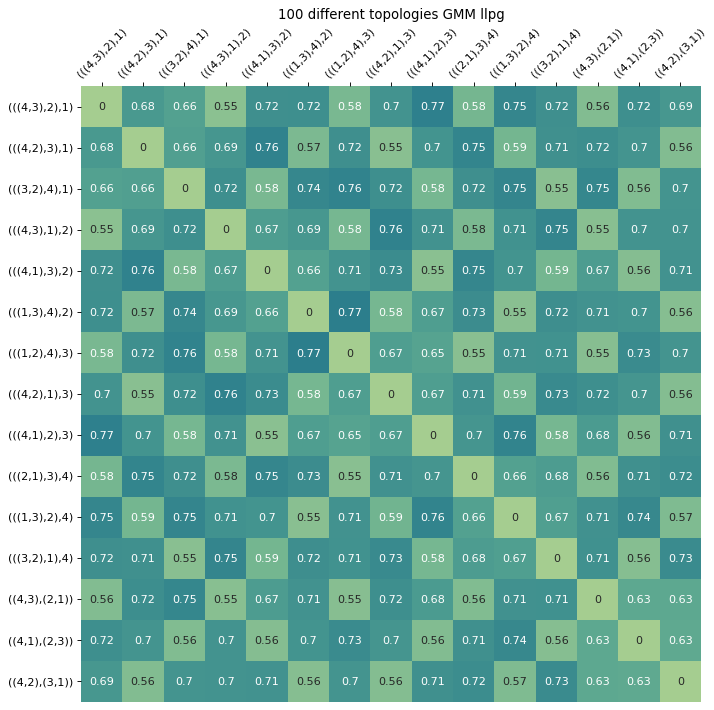

In [49]:
# different topologies with 100 trees

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_100 = pd.DataFrame(accuracy)
diff_kmeans_100.columns = trees
diff_kmeans_100.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('100 different topologies K-means')
plot = sns.heatmap(diff_kmeans_100, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_prob_100 = pd.DataFrame(accuracy)
diff_prob_100.columns = trees
diff_prob_100.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('100 different topologies GMM prob')
plot = sns.heatmap(diff_prob_100, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/GMM/GMM_llpg_4_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/GMM/GMM_llpg_4_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_llpg_100 = pd.DataFrame(accuracy)
diff_llpg_100.columns = trees
diff_llpg_100.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('100 different topologies GMM llpg')
plot = sns.heatmap(diff_llpg_100, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

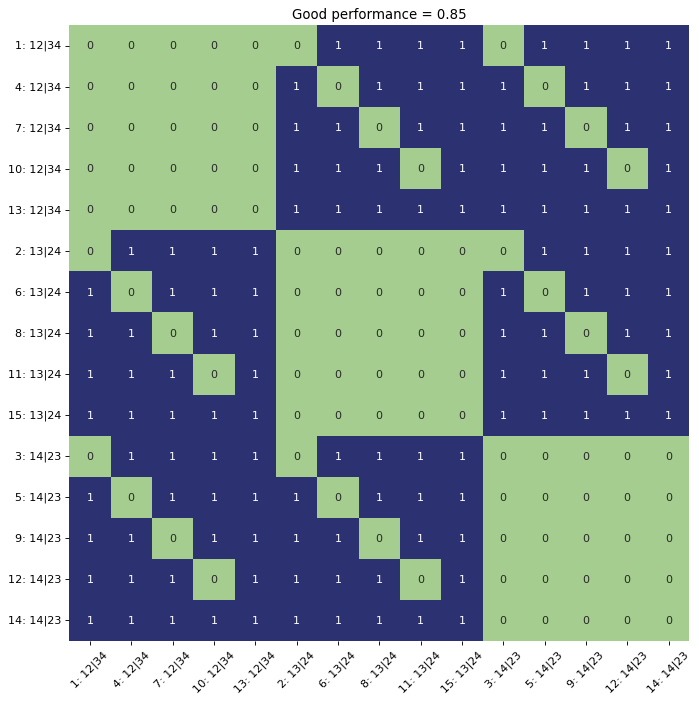

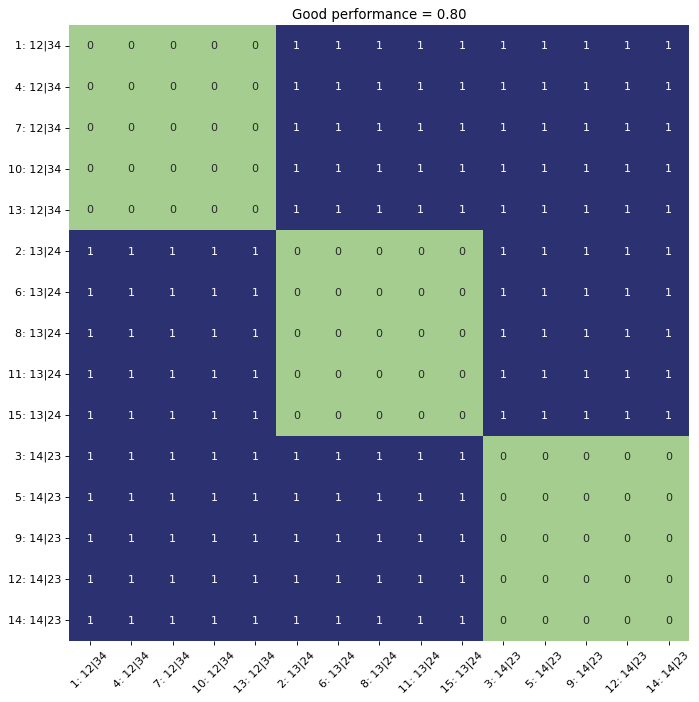

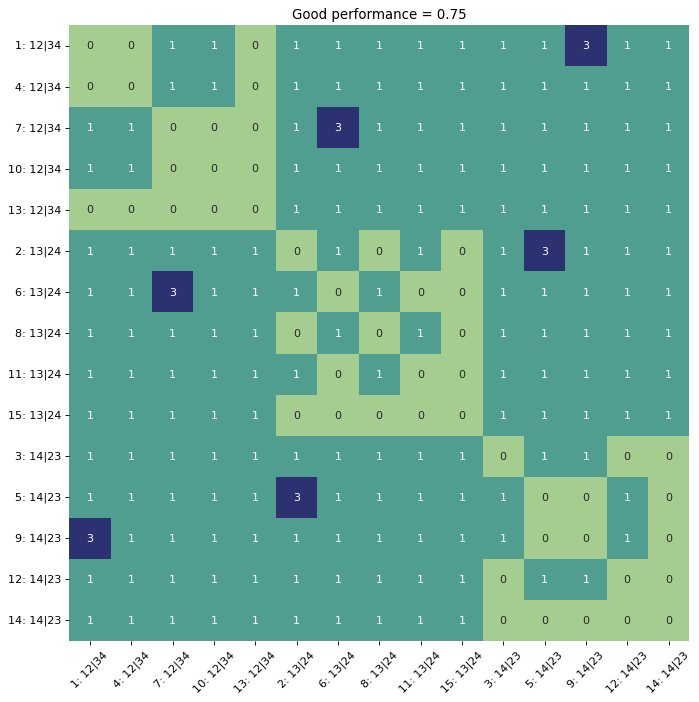

In [50]:
result_kmeans = diff_kmeans_100.to_numpy()
result_GMM = diff_prob_100.to_numpy()
all_comb = list(combinations(range(0,15),2))

good_kmeans_85 = []
good_GMM_85 = []

good_kmeans_80 = []
good_GMM_80 = []

good_kmeans_75 = []
good_GMM_75 = []

for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    
    if result_kmeans[i,j] >= 0.85:
        good_kmeans_85.append(pair)
    if result_GMM[i,j] >= 0.85:
        good_GMM_85.append(pair)
    
    if result_kmeans[i,j] >= 0.8:
        good_kmeans_80.append(pair)
    if result_GMM[i,j] >= 0.8:
        good_GMM_80.append(pair)
        
    if result_kmeans[i,j] >= 0.75:
        good_kmeans_75.append(pair)
    if result_GMM[i,j] >= 0.75:
        good_GMM_75.append(pair)

matrix_85 = [[0 for x in range(15)] for y in range(15)] 


for pair in good_kmeans_85:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_85[i][j] += 1
    matrix_85[j][i] += 1

for pair in good_GMM_85:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_85[i][j] += 2
    matrix_85[j][i] += 2
    
matrix_85 = pd.DataFrame(matrix_85)
matrix_85.columns = unrooted
matrix_85.index = unrooted
matrix_85 = matrix_85.reindex(newIdx)
matrix_85 = matrix_85.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.85')
plot = sns.heatmap(matrix_85, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

# accuracy >= 0.8
matrix_80 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_80:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_80[i][j] += 1
    matrix_80[j][i] += 1

for pair in good_GMM_80:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_80[i][j] += 2
    matrix_80[j][i] += 2
    
matrix_80 = pd.DataFrame(matrix_80)
matrix_80.columns = unrooted
matrix_80.index = unrooted
matrix_80 = matrix_80.reindex(newIdx)
matrix_80 = matrix_80.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.80')
plot = sns.heatmap(matrix_80, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

# accuracy >= 0.75
matrix_75 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_75:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_75[i][j] += 1
    matrix_75[j][i] += 1

for pair in good_GMM_75:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_75[i][j] += 2
    matrix_75[j][i] += 2
    
matrix_75 = pd.DataFrame(matrix_75)
matrix_75.columns = unrooted
matrix_75.index = unrooted
matrix_75 = matrix_75.reindex(newIdx)
matrix_75 = matrix_75.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.75')
plot = sns.heatmap(matrix_75, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


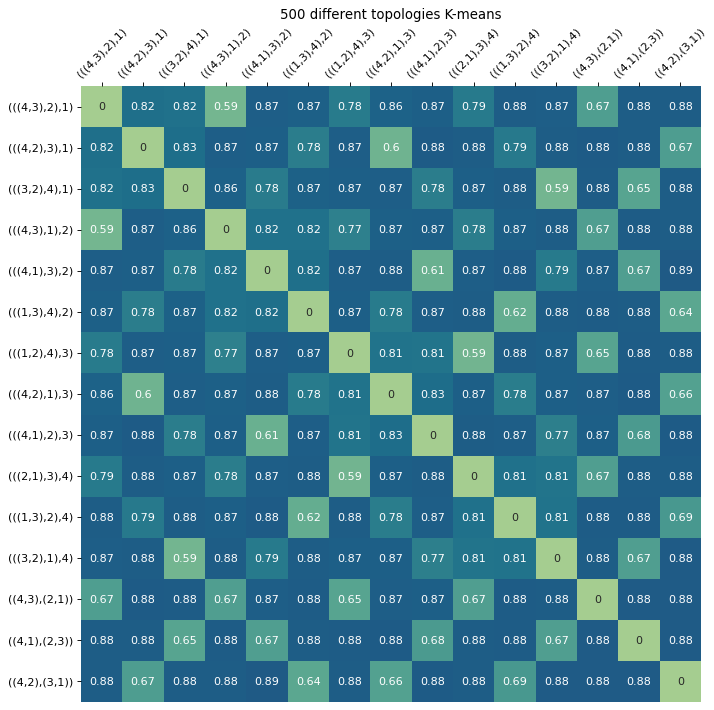

In [51]:
# different topologies with 500 trees

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_500 = pd.DataFrame(accuracy)
diff_kmeans_500.columns = trees
diff_kmeans_500.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('500 different topologies K-means')
plot = sns.heatmap(diff_kmeans_500, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_prob_500 = pd.DataFrame(accuracy)
diff_prob_500.columns = trees
diff_prob_500.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('500 different topologies GMM prob')
plot = sns.heatmap(diff_prob_500, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/GMM/GMM_llpg_4_topo_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/GMM/GMM_llpg_4_topo_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_llpg_500 = pd.DataFrame(accuracy)
diff_llpg_500.columns = trees
diff_llpg_500.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('500 different topologies GMM llpg')
plot = sns.heatmap(diff_llpg_500, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


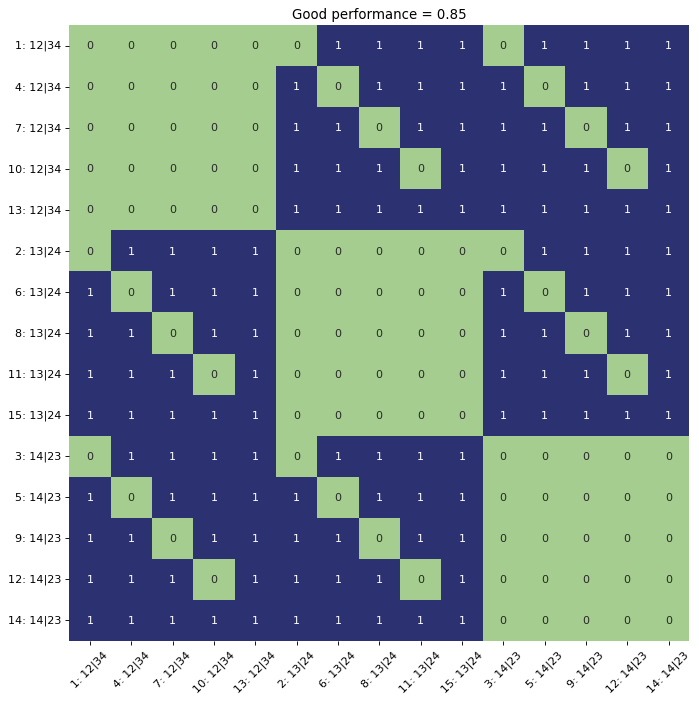

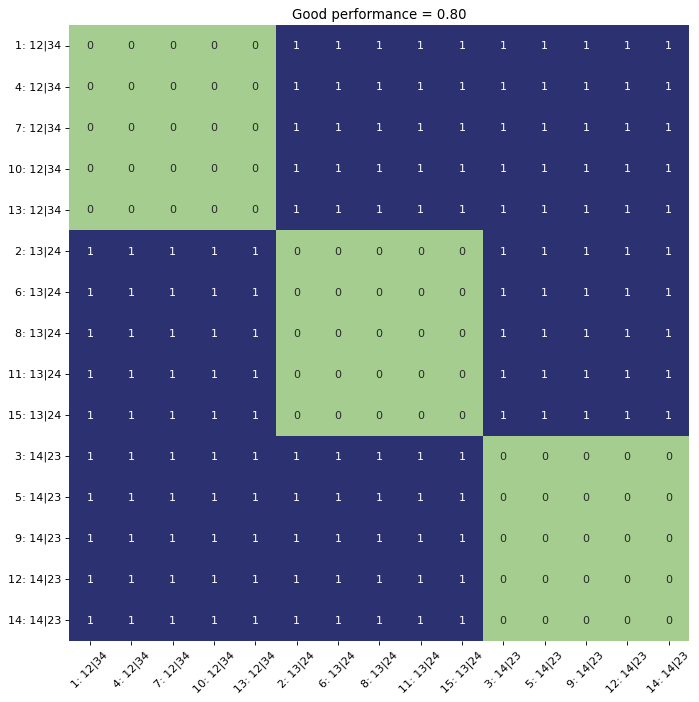

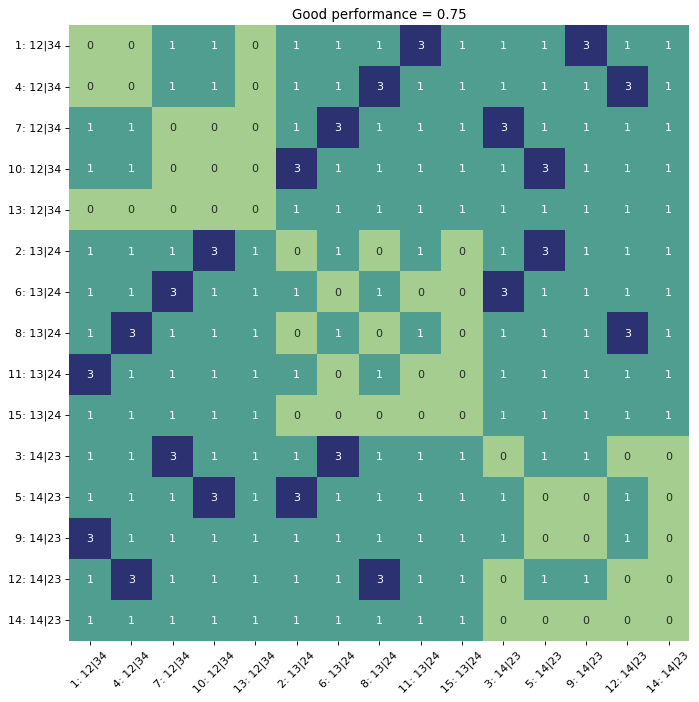

In [52]:
result_kmeans = diff_kmeans_500.to_numpy()
result_GMM = diff_prob_500.to_numpy()
all_comb = list(combinations(range(0,15),2))

good_kmeans_85 = []
good_GMM_85 = []

good_kmeans_80 = []
good_GMM_80 = []

good_kmeans_75 = []
good_GMM_75 = []

for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    
    if result_kmeans[i,j] >= 0.85:
        good_kmeans_85.append(pair)
    if result_GMM[i,j] >= 0.85:
        good_GMM_85.append(pair)
    
    if result_kmeans[i,j] >= 0.8:
        good_kmeans_80.append(pair)
    if result_GMM[i,j] >= 0.8:
        good_GMM_80.append(pair)
        
    if result_kmeans[i,j] >= 0.75:
        good_kmeans_75.append(pair)
    if result_GMM[i,j] >= 0.75:
        good_GMM_75.append(pair)

matrix_85 = [[0 for x in range(15)] for y in range(15)] 


for pair in good_kmeans_85:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_85[i][j] += 1
    matrix_85[j][i] += 1

for pair in good_GMM_85:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_85[i][j] += 2
    matrix_85[j][i] += 2
    
matrix_85 = pd.DataFrame(matrix_85)
matrix_85.columns = unrooted
matrix_85.index = unrooted
matrix_85 = matrix_85.reindex(newIdx)
matrix_85 = matrix_85.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.85')
plot = sns.heatmap(matrix_85, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

# accuracy >= 0.8
matrix_80 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_80:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_80[i][j] += 1
    matrix_80[j][i] += 1

for pair in good_GMM_80:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_80[i][j] += 2
    matrix_80[j][i] += 2
    
matrix_80 = pd.DataFrame(matrix_80)
matrix_80.columns = unrooted
matrix_80.index = unrooted
matrix_80 = matrix_80.reindex(newIdx)
matrix_80 = matrix_80.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.80')
plot = sns.heatmap(matrix_80, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

# accuracy >= 0.75
matrix_75 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_75:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_75[i][j] += 1
    matrix_75[j][i] += 1

for pair in good_GMM_75:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_75[i][j] += 2
    matrix_75[j][i] += 2
    
matrix_75 = pd.DataFrame(matrix_75)
matrix_75.columns = unrooted
matrix_75.index = unrooted
matrix_75 = matrix_75.reindex(newIdx)
matrix_75 = matrix_75.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.75')
plot = sns.heatmap(matrix_75, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


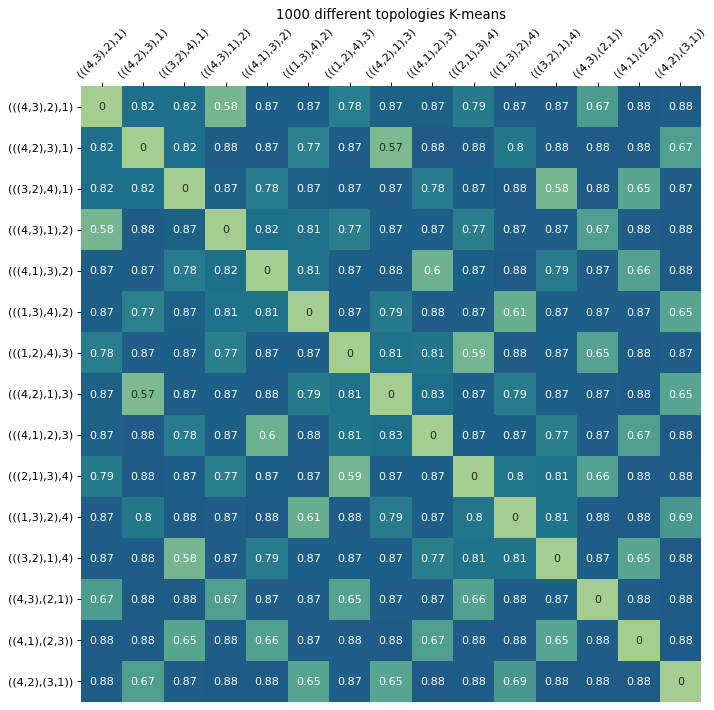

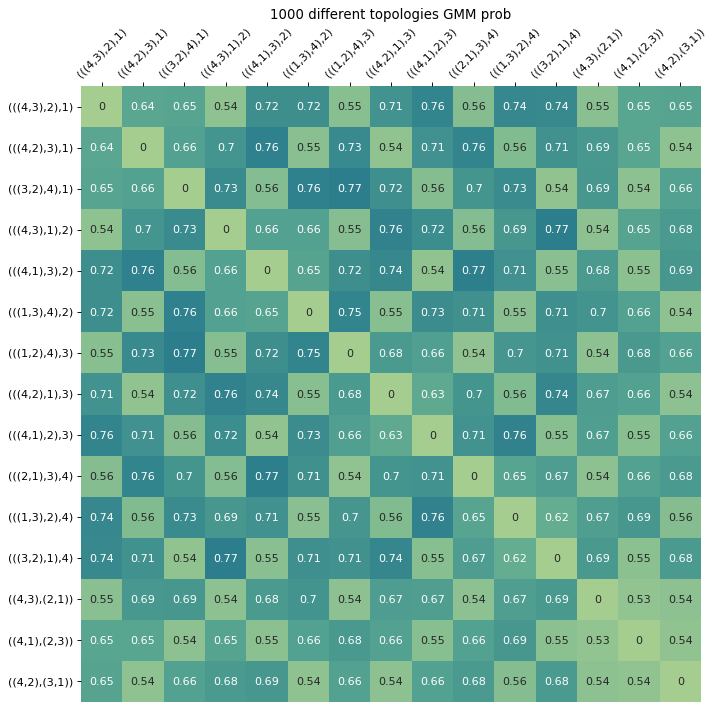

In [53]:
# different topologies with 1000 trees

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_1000 = pd.DataFrame(accuracy)
diff_kmeans_1000.columns = trees
diff_kmeans_1000.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('1000 different topologies K-means')
plot = sns.heatmap(diff_kmeans_1000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_prob_1000 = pd.DataFrame(accuracy)
diff_prob_1000.columns = trees
diff_prob_1000.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('1000 different topologies GMM prob')
plot = sns.heatmap(diff_prob_1000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/GMM/GMM_llpg_4_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/GMM/GMM_llpg_4_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_llpg_1000 = pd.DataFrame(accuracy)
diff_llpg_1000.columns = trees
diff_llpg_1000.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('1000 different topologies GMM llpg')
plot = sns.heatmap(diff_llpg_1000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


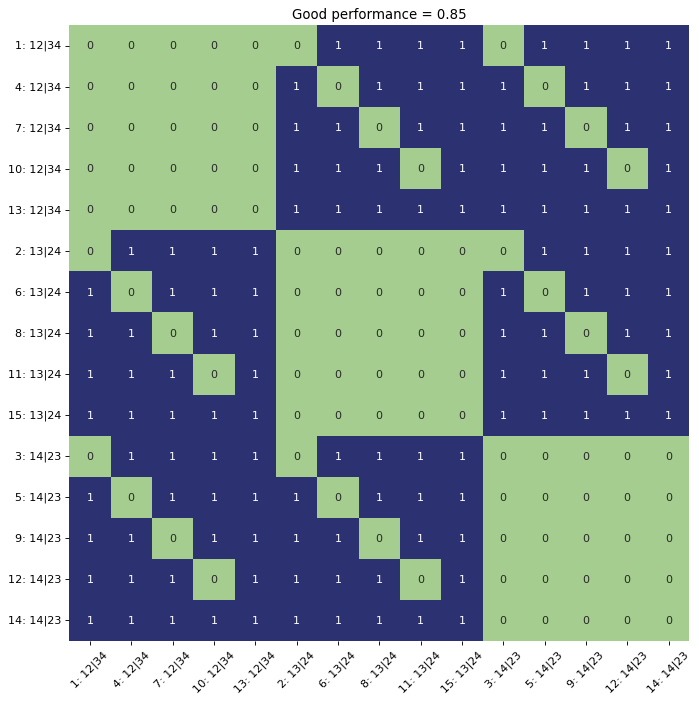

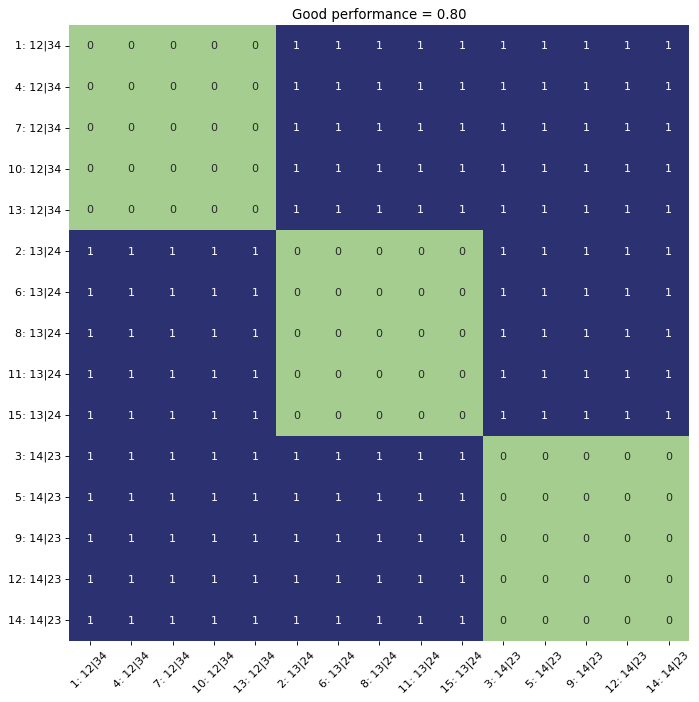

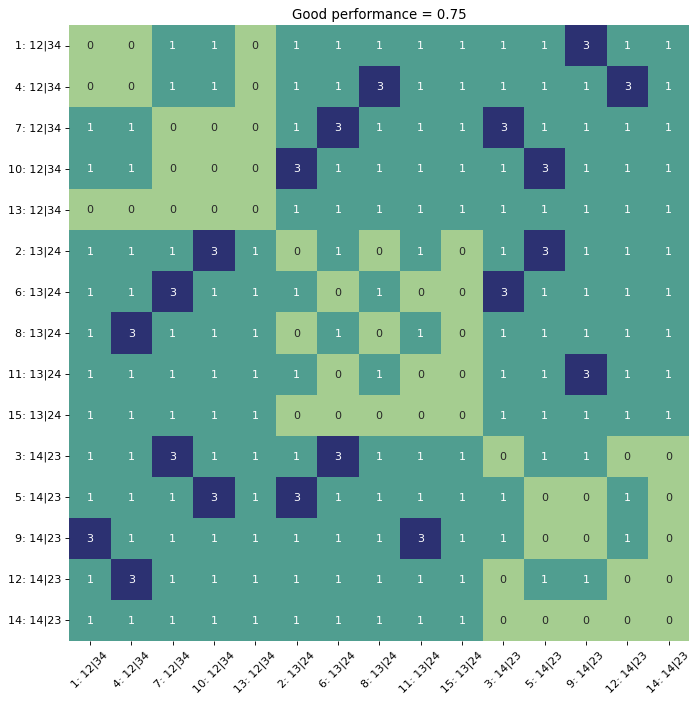

In [54]:
result_kmeans = diff_kmeans_1000.to_numpy()
result_GMM = diff_prob_1000.to_numpy()
all_comb = list(combinations(range(0,15),2))

good_kmeans_85 = []
good_GMM_85 = []

good_kmeans_80 = []
good_GMM_80 = []

good_kmeans_75 = []
good_GMM_75 = []

for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    
    if result_kmeans[i,j] >= 0.85:
        good_kmeans_85.append(pair)
    if result_GMM[i,j] >= 0.85:
        good_GMM_85.append(pair)
    
    if result_kmeans[i,j] >= 0.8:
        good_kmeans_80.append(pair)
    if result_GMM[i,j] >= 0.8:
        good_GMM_80.append(pair)
        
    if result_kmeans[i,j] >= 0.75:
        good_kmeans_75.append(pair)
    if result_GMM[i,j] >= 0.75:
        good_GMM_75.append(pair)

matrix_85 = [[0 for x in range(15)] for y in range(15)] 


for pair in good_kmeans_85:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_85[i][j] += 1
    matrix_85[j][i] += 1

for pair in good_GMM_85:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_85[i][j] += 2
    matrix_85[j][i] += 2
    
matrix_85 = pd.DataFrame(matrix_85)
matrix_85.columns = unrooted
matrix_85.index = unrooted
matrix_85 = matrix_85.reindex(newIdx)
matrix_85 = matrix_85.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.85')
plot = sns.heatmap(matrix_85, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

# accuracy >= 0.8
matrix_80 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_80:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_80[i][j] += 1
    matrix_80[j][i] += 1

for pair in good_GMM_80:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_80[i][j] += 2
    matrix_80[j][i] += 2
    
matrix_80 = pd.DataFrame(matrix_80)
matrix_80.columns = unrooted
matrix_80.index = unrooted
matrix_80 = matrix_80.reindex(newIdx)
matrix_80 = matrix_80.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.80')
plot = sns.heatmap(matrix_80, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

# accuracy >= 0.75
matrix_75 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_75:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_75[i][j] += 1
    matrix_75[j][i] += 1

for pair in good_GMM_75:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_75[i][j] += 2
    matrix_75[j][i] += 2
    
matrix_75 = pd.DataFrame(matrix_75)
matrix_75.columns = unrooted
matrix_75.index = unrooted
matrix_75 = matrix_75.reindex(newIdx)
matrix_75 = matrix_75.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.75')
plot = sns.heatmap(matrix_75, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


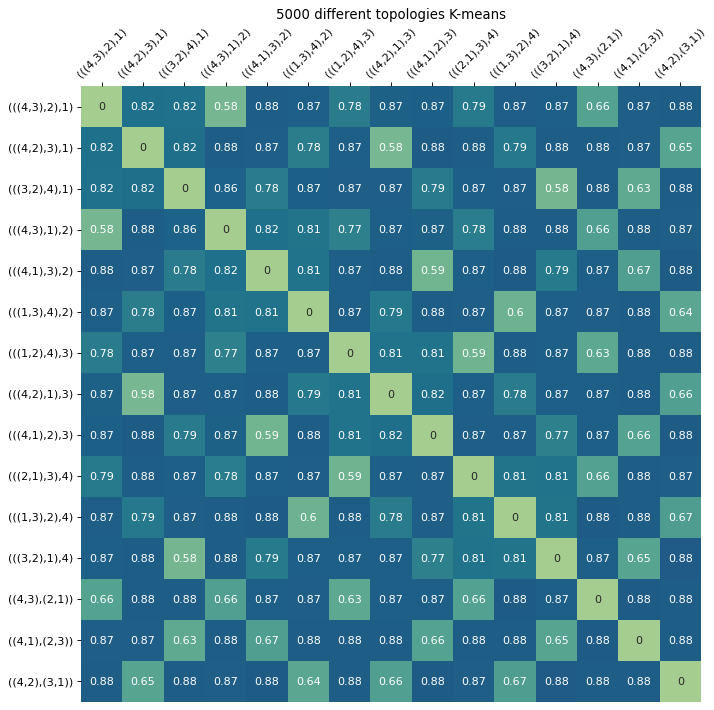

In [55]:
# different topologies with 5000 trees

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/Kmeans/kmeans_4_diff_topo_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_5000 = pd.DataFrame(accuracy)
diff_kmeans_5000.columns = trees
diff_kmeans_5000.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('5000 different topologies K-means')
plot = sns.heatmap(diff_kmeans_5000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/GMM/GMM_prob_4_topo_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_prob_5000 = pd.DataFrame(accuracy)
diff_prob_5000.columns = trees
diff_prob_5000.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('5000 different topologies GMM prob')
plot = sns.heatmap(diff_prob_5000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/4-taxon/diff-topo/GMM/GMM_llpg_4_topo_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/4-taxon/diff-topo/GMM/GMM_llpg_4_topo_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_llpg_5000 = pd.DataFrame(accuracy)
diff_llpg_5000.columns = trees
diff_llpg_5000.index = trees

plt.figure(figsize=(10,10), dpi=80)
plt.title('5000 different topologies GMM llpg')
plot = sns.heatmap(diff_llpg_5000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


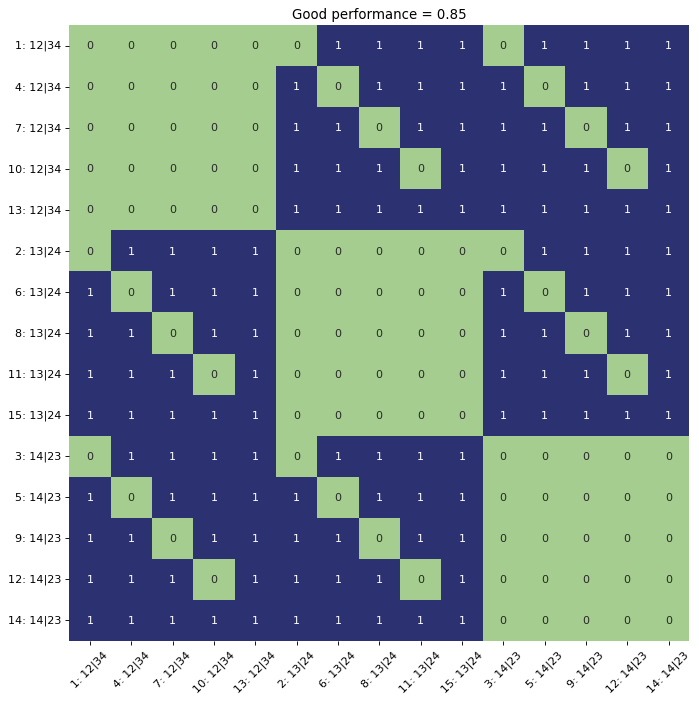

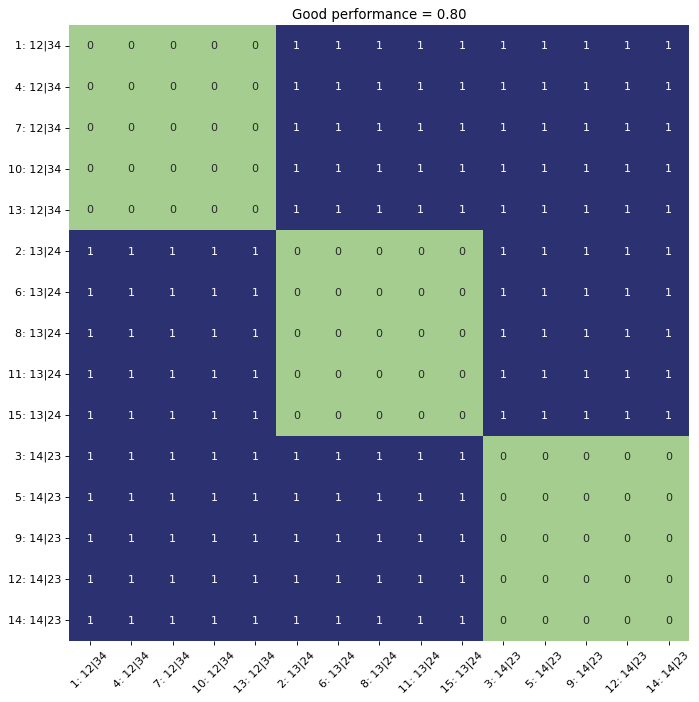

In [56]:
result_kmeans = diff_kmeans_5000.to_numpy()
result_GMM = diff_prob_5000.to_numpy()
all_comb = list(combinations(range(0,15),2))

good_kmeans_85 = []
good_GMM_85 = []

good_kmeans_80 = []
good_GMM_80 = []

good_kmeans_75 = []
good_GMM_75 = []

for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    
    if result_kmeans[i,j] >= 0.85:
        good_kmeans_85.append(pair)
    if result_GMM[i,j] >= 0.85:
        good_GMM_85.append(pair)
    
    if result_kmeans[i,j] >= 0.8:
        good_kmeans_80.append(pair)
    if result_GMM[i,j] >= 0.8:
        good_GMM_80.append(pair)
        
    if result_kmeans[i,j] >= 0.75:
        good_kmeans_75.append(pair)
    if result_GMM[i,j] >= 0.75:
        good_GMM_75.append(pair)

matrix_85 = [[0 for x in range(15)] for y in range(15)] 


for pair in good_kmeans_85:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_85[i][j] += 1
    matrix_85[j][i] += 1

for pair in good_GMM_85:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_85[i][j] += 2
    matrix_85[j][i] += 2
    
matrix_85 = pd.DataFrame(matrix_85)
matrix_85.columns = unrooted
matrix_85.index = unrooted
matrix_85 = matrix_85.reindex(newIdx)
matrix_85 = matrix_85.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.85')
plot = sns.heatmap(matrix_85, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

# accuracy >= 0.8
matrix_80 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_80:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_80[i][j] += 1
    matrix_80[j][i] += 1

for pair in good_GMM_80:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_80[i][j] += 2
    matrix_80[j][i] += 2
    
matrix_80 = pd.DataFrame(matrix_80)
matrix_80.columns = unrooted
matrix_80.index = unrooted
matrix_80 = matrix_80.reindex(newIdx)
matrix_80 = matrix_80.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.80')
plot = sns.heatmap(matrix_80, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

# accuracy >= 0.75
matrix_75 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_75:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_75[i][j] += 1
    matrix_75[j][i] += 1

for pair in good_GMM_75:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_75[i][j] += 2
    matrix_75[j][i] += 2
    
matrix_75 = pd.DataFrame(matrix_75)
matrix_75.columns = unrooted
matrix_75.index = unrooted
matrix_75 = matrix_75.reindex(newIdx)
matrix_75 = matrix_75.reindex(columns = newIdx)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.75')
plot = sns.heatmap(matrix_75, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)


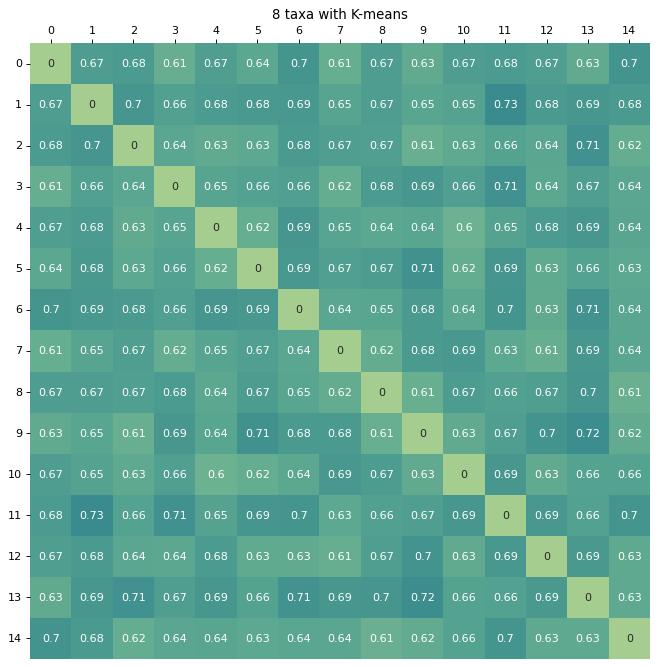

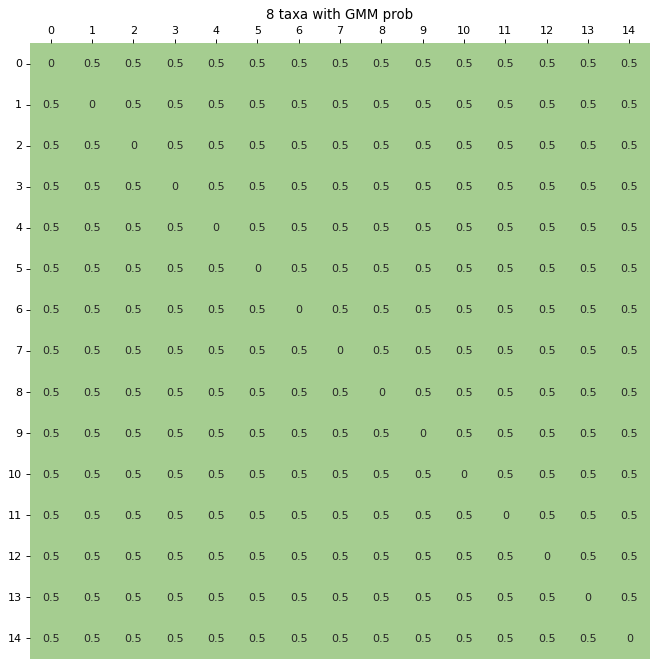

In [57]:
# different topologies for 8 taxa

df = pd.read_csv("../../../data/result/8-taxon/rawKmeans/kmeans_8_diff_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/8-taxon/rawKmeans/kmeans_8_diff_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_1000 = pd.DataFrame(accuracy)

plt.figure(figsize=(10,10), dpi=80)
plt.title('8 taxa with K-means')
plot = sns.heatmap(diff_kmeans_1000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='y', rotation=0)

df = pd.read_csv("../../../data/result/8-taxon/GMM/GMM_prob_8_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/8-taxon/GMM/GMM_prob_8_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_prob_1000 = pd.DataFrame(accuracy)

plt.figure(figsize=(10,10), dpi=80)
plt.title('8 taxa with GMM prob')
plot = sns.heatmap(diff_prob_1000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='y', rotation=0)

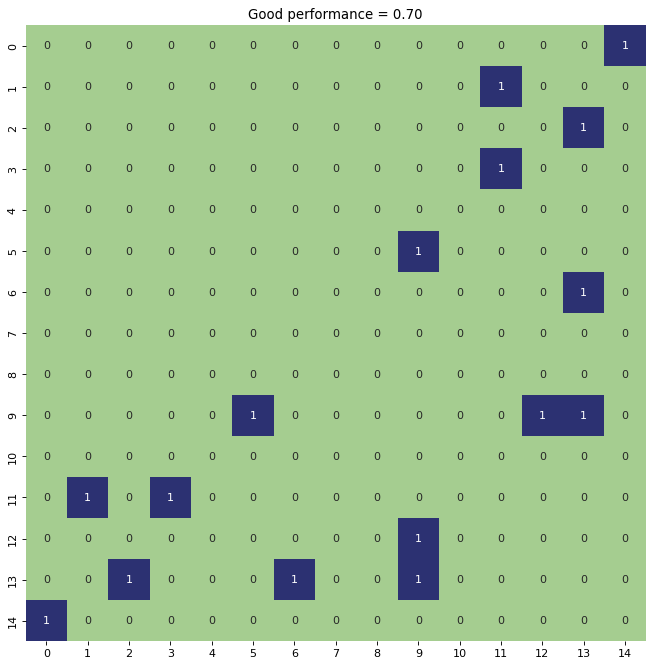

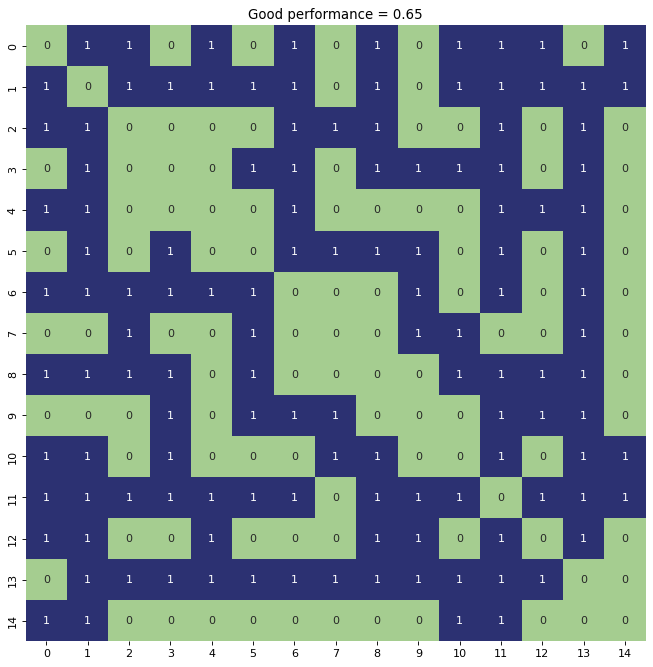

In [58]:
result_kmeans = diff_kmeans_1000.to_numpy()
all_comb = list(combinations(range(0,15),2))

good_kmeans_70 = []
good_kmeans_65 = []

for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    
    if result_kmeans[i,j] >= 0.7:
        good_kmeans_70.append(pair)       
    if result_kmeans[i,j] >= 0.65:
        good_kmeans_65.append(pair)
        
# accuracy >= 0.7
matrix_70 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_70:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_70[i][j] += 1
    matrix_70[j][i] += 1

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.70')
plot = sns.heatmap(matrix_70, annot=True, cmap="crest", cbar = False)

# accuracy >= 0.65
matrix_65 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_65:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_65[i][j] += 1
    matrix_65[j][i] += 1
    
plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.65')
plot = sns.heatmap(matrix_65, annot=True, cmap="crest", cbar = False)


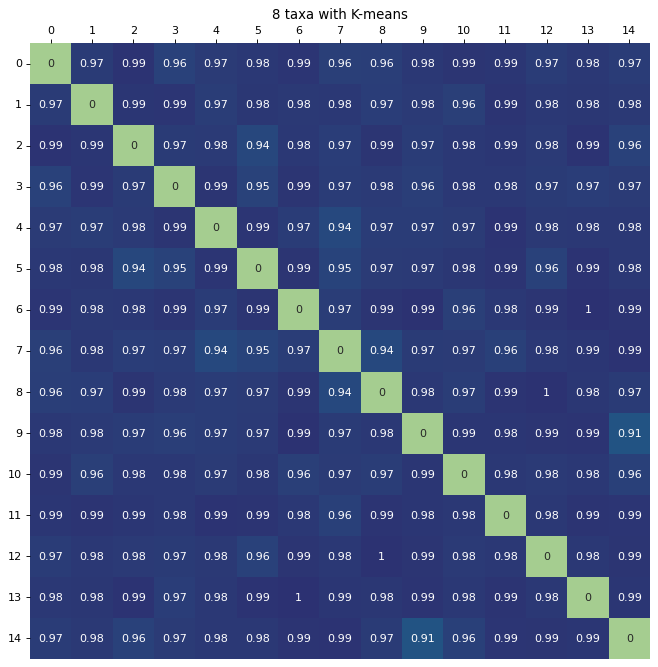

In [59]:
df = pd.read_csv("../../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_50 = pd.DataFrame(accuracy)

plt.figure(figsize=(10,10), dpi=80)
plt.title('8 taxa with K-means')
plot = sns.heatmap(diff_kmeans_50, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='y', rotation=0)

In [60]:
df = pd.read_csv("../../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_100 = pd.DataFrame(accuracy)

plt.figure(figsize=(10,10), dpi=80)
plt.title('8 taxa with K-means')
plot = sns.heatmap(diff_kmeans_100, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='y', rotation=0)

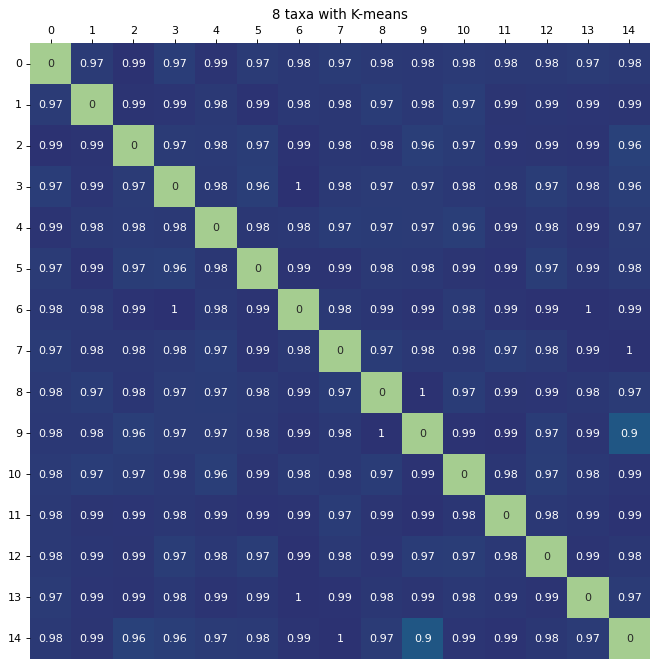

In [3]:
df = pd.read_csv("../../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_500 = pd.DataFrame(accuracy)

plt.figure(figsize=(10,10), dpi=80)
plt.title('8 taxa with K-means')
plot = sns.heatmap(diff_kmeans_500, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='y', rotation=0)

result_kmeans = diff_kmeans_500.to_numpy()
all_comb = list(combinations(range(0,15),2))
good_kmeans = []
for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    if result_kmeans[i,j] >= 0.97:
        good_kmeans.append(pair)
        
matrix = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix[i][j] += 1
    matrix[j][i] += 1
    
matrix = pd.DataFrame(matrix)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.97')
plot = sns.heatmap(matrix, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=0)
plot.tick_params(axis='y', rotation=0)

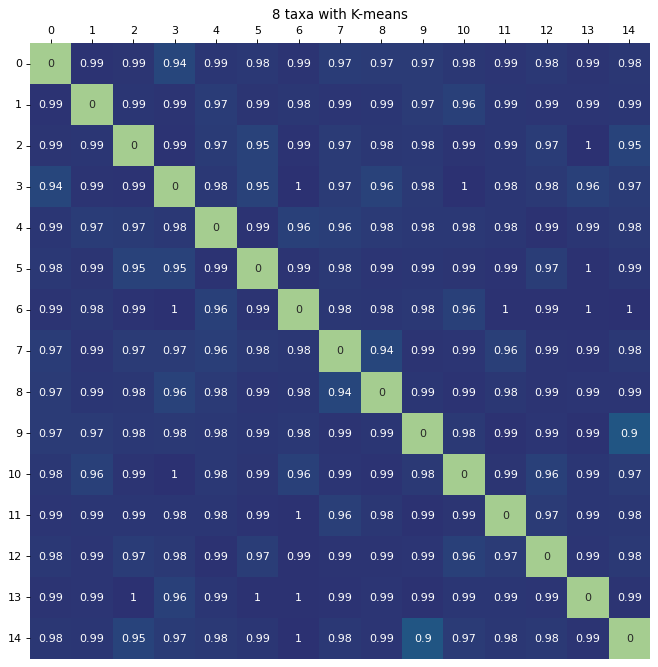

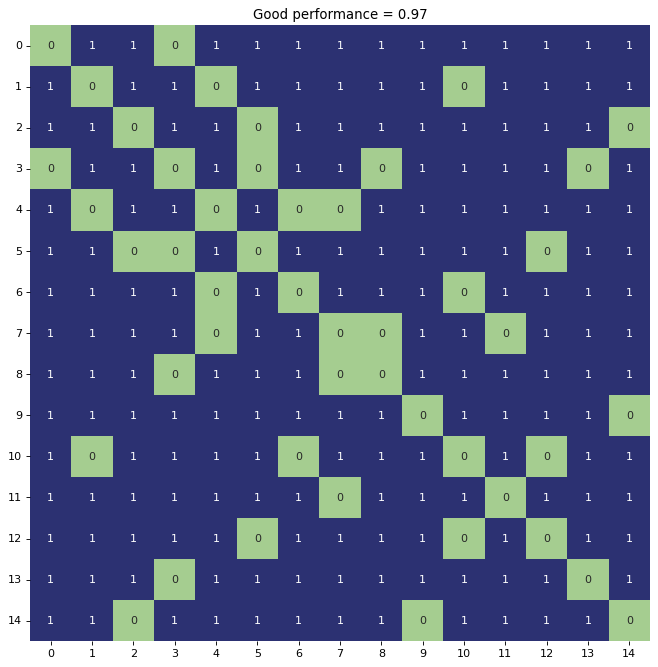

In [4]:
df = pd.read_csv("../../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_1000 = pd.DataFrame(accuracy)

plt.figure(figsize=(10,10), dpi=80)
plt.title('8 taxa with K-means')
plot = sns.heatmap(diff_kmeans_1000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='y', rotation=0)

result_kmeans = diff_kmeans_1000.to_numpy()
all_comb = list(combinations(range(0,15),2))
good_kmeans = []
for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    if result_kmeans[i,j] >= 0.97:
        good_kmeans.append(pair)
        
matrix = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix[i][j] += 1
    matrix[j][i] += 1
    
matrix = pd.DataFrame(matrix)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.97')
plot = sns.heatmap(matrix, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=0)
plot.tick_params(axis='y', rotation=0)

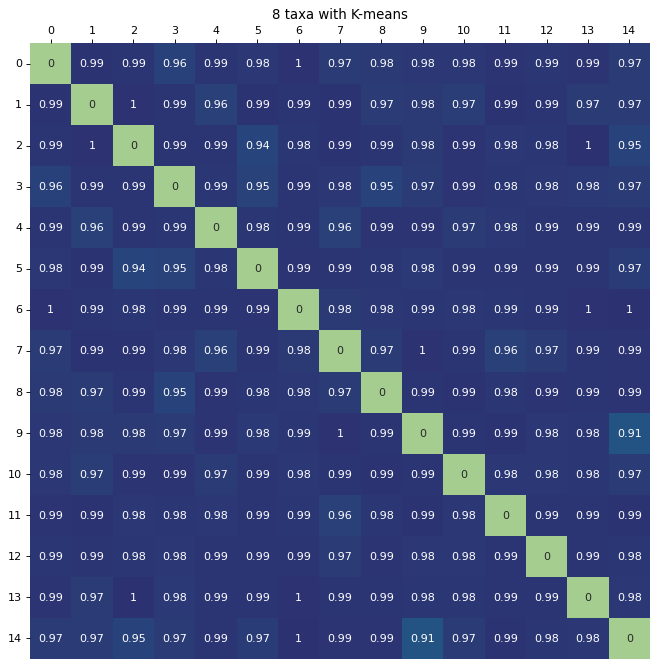

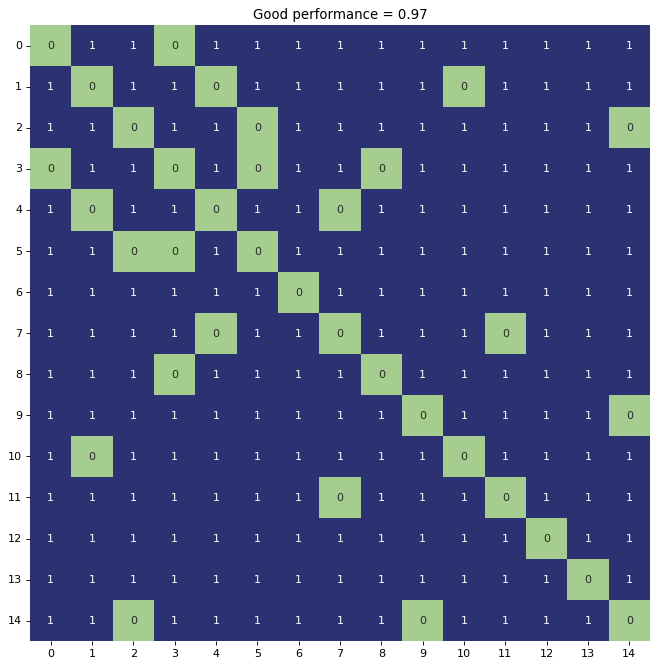

In [5]:
df = pd.read_csv("../../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/8-taxon/repKmeans/kmeans_8_diff_topo_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_5000 = pd.DataFrame(accuracy)

plt.figure(figsize=(10,10), dpi=80)
plt.title('8 taxa with K-means')
plot = sns.heatmap(diff_kmeans_5000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='y', rotation=0)

result_kmeans = diff_kmeans_5000.to_numpy()
all_comb = list(combinations(range(0,15),2))
good_kmeans = []
for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    if result_kmeans[i,j] >= 0.97:
        good_kmeans.append(pair)
        
matrix = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix[i][j] += 1
    matrix[j][i] += 1
    
matrix = pd.DataFrame(matrix)

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.97')
plot = sns.heatmap(matrix, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=0)
plot.tick_params(axis='y', rotation=0)

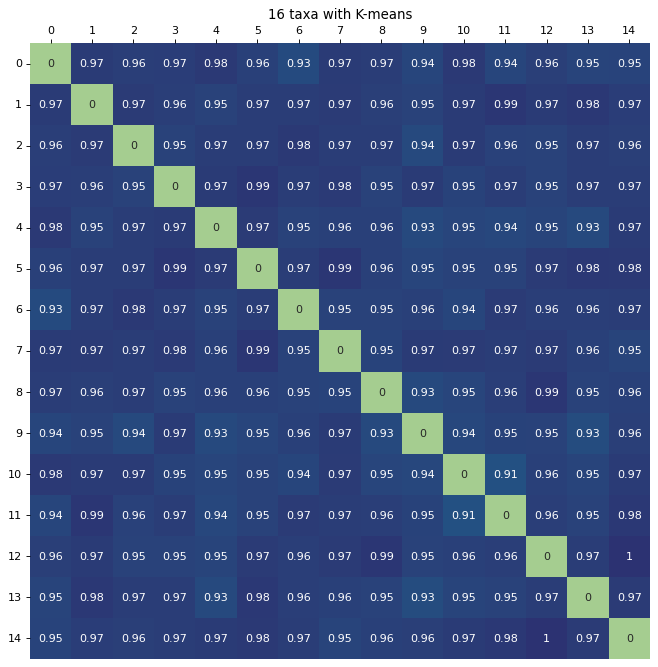

In [66]:
df = pd.read_csv("../../../data/result/16-taxon/kmeans_16_diff_topo_50_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/16-taxon/kmeans_16_diff_topo_50_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_50 = pd.DataFrame(accuracy)

plt.figure(figsize=(10,10), dpi=80)
plt.title('16 taxa with K-means')
plot = sns.heatmap(diff_kmeans_50, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='y', rotation=0)

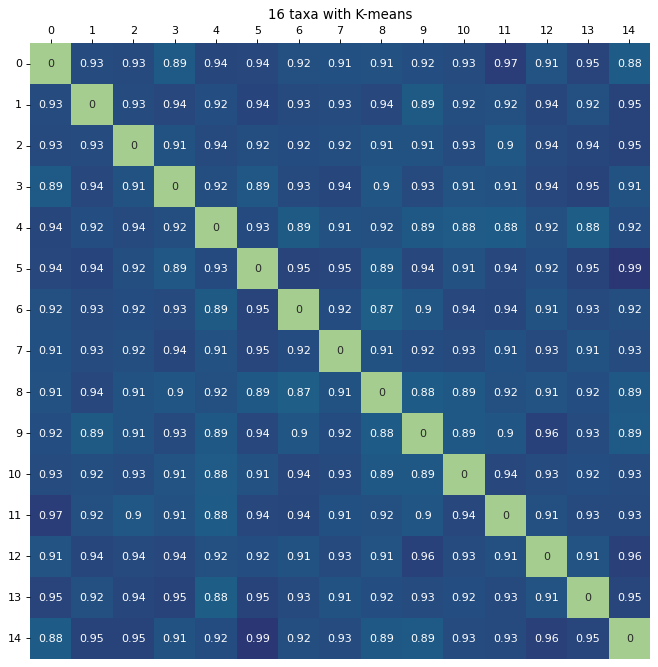

In [67]:
df = pd.read_csv("../../../data/result/16-taxon/kmeans_16_diff_topo_100_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/16-taxon/kmeans_16_diff_topo_100_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_100 = pd.DataFrame(accuracy)

plt.figure(figsize=(10,10), dpi=80)
plt.title('16 taxa with K-means')
plot = sns.heatmap(diff_kmeans_100, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='y', rotation=0)

In [68]:
df = pd.read_csv("../../../data/result/16-taxon/kmeans_16_diff_topo_500_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/16-taxon/kmeans_16_diff_topo_500_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_500 = pd.DataFrame(accuracy)

plt.figure(figsize=(10,10), dpi=80)
plt.title('16 taxa with K-means')
plot = sns.heatmap(diff_kmeans_500, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='y', rotation=0)

In [69]:
df = pd.read_csv("../../../data/result/16-taxon/kmeans_16_diff_topo_1000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/16-taxon/kmeans_16_diff_topo_1000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_1000 = pd.DataFrame(accuracy)

plt.figure(figsize=(10,10), dpi=80)
plt.title('16 taxa with K-means')
plot = sns.heatmap(diff_kmeans_1000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='y', rotation=0)

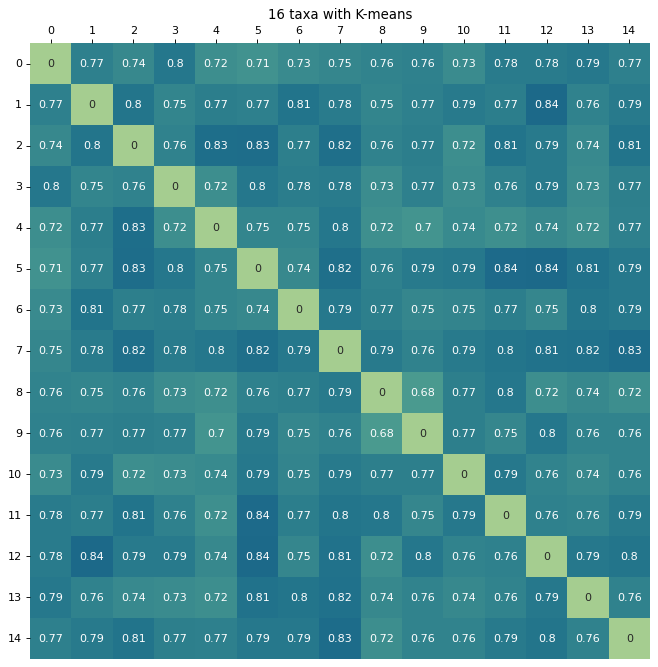

In [70]:
df = pd.read_csv("../../../data/result/16-taxon/kmeans_16_diff_topo_5000_1.csv")
accuracy = df.values
for i in range(99):
    path = "../../../data/result/16-taxon/kmeans_16_diff_topo_5000_" + str(i + 2) + ".csv"
    df = pd.read_csv(path)
    accuracy += df.values

accuracy /= 100
diff_kmeans_5000 = pd.DataFrame(accuracy)

plt.figure(figsize=(10,10), dpi=80)
plt.title('16 taxa with K-means')
plot = sns.heatmap(diff_kmeans_5000, annot=True, cmap="crest",vmin = 0.5, vmax = 1, cbar=False);
plot.xaxis.tick_top()
plot.tick_params(axis='y', rotation=0)

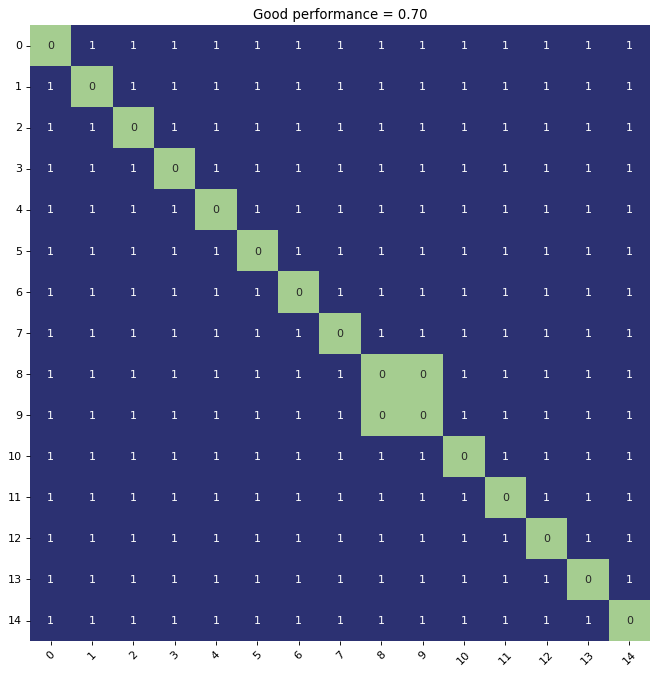

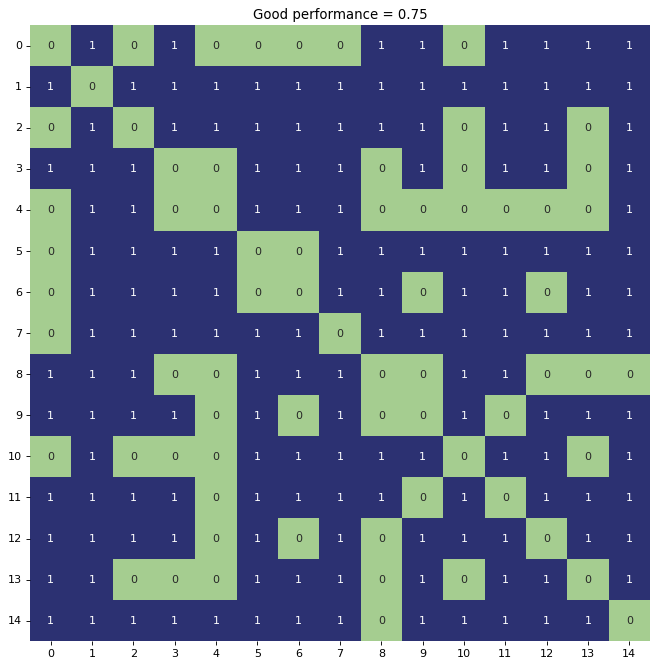

In [28]:
result_kmeans = diff_kmeans_5000.to_numpy()
all_comb = list(combinations(range(0,15),2))

good_kmeans_70 = []
good_kmeans_75 = []

for comb in all_comb:
    i = comb[0]
    j = comb[1]
    pair = (i+1,j+1)
    
    if result_kmeans[i,j] >= 0.75:
        good_kmeans_75.append(pair)       
    if result_kmeans[i,j] >= 0.70:
        good_kmeans_70.append(pair)
        
# accuracy >= 0.7
matrix_70 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_70:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_70[i][j] += 1
    matrix_70[j][i] += 1

plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.70')
plot = sns.heatmap(matrix_70, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='x', rotation=45)
plot.tick_params(axis='y', rotation=0)

matrix_75 = [[0 for x in range(15)] for y in range(15)] 

for pair in good_kmeans_75:
    i = pair[0] - 1
    j = pair[1] - 1
    matrix_75[i][j] += 1
    matrix_75[j][i] += 1
    
plt.figure(figsize=(10,10), dpi=80)
plt.title('Good performance = 0.75')
plot = sns.heatmap(matrix_75, annot=True, cmap="crest", cbar = False)
plot.tick_params(axis='y', rotation=0)
